In [1]:
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np
import random

from scipy.stats import randint as sp_randint

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score 


import matplotlib.patches as mpatches
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 7)
plt.style.use('fast')

from sklearn.neural_network import MLPRegressor


np.random.seed(123) # for reproducibility
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from kerastuner.tuners import RandomSearch


In [2]:
print(tf.__version__)

2.1.0


In [3]:
df = pd.read_csv('df_semanal_departamental.csv')

In [4]:
df

,Unnamed: 0,periodo,año,Semana/Mes,Número de personas secuestradas,Número de personas desplazadas,Crecimiento_Pob,Hectareas_Coca,casos_,total_poblacion,...,DIMENSION URBANA,DIMENSIÓN ECONOMICA,DIMENSIÓN CALIDAD DE VIDA,DIMENSIÓN SEGURIDAD,Temperatura,Precipitación,EVI,promedio_poblacion,departamento,incidencia_
0,0,1,2007,1,655.0,350219.0,2.680018,2725.0,2,5835008,...,0.098059,0.505536,0.541605,0.745504,20.522872,30.701490,4322.300298,49466.825854,ANTIOQUIA,0.034276
1,1,2,2007,2,655.0,350219.0,2.680018,2725.0,0,5835008,...,0.098059,0.505536,0.541605,0.745504,20.408476,71.852499,4339.141908,49466.825854,ANTIOQUIA,0.000000
2,2,3,2007,3,655.0,350219.0,2.680018,2725.0,0,5835008,...,0.098059,0.505536,0.541605,0.745504,20.602056,43.309784,4259.038617,49466.825854,ANTIOQUIA,0.000000
3,3,4,2007,4,655.0,350219.0,2.680018,2725.0,0,5835008,...,0.098059,0.505536,0.541605,0.745504,20.915127,90.779382,4110.160310,49466.825854,ANTIOQUIA,0.000000
4,4,5,2007,5,655.0,350219.0,2.680018,2725.0,2,5835008,...,0.098059,0.505536,0.541605,0.745504,21.154200,15.511126,4164.689312,49466.825854,ANTIOQUIA,0.034276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14611,517,518,2016,48,23.0,12437.0,0.403003,1242.0,0,73702,...,0.130621,0.347421,0.322762,0.622042,26.357072,28.920200,3571.367262,16544.977969,VICHADA,0.000000
14612,518,519,2016,49,23.0,12437.0,0.403003,1242.0,0,73702,...,0.130621,0.347421,0.322762,0.622042,25.889285,14.484025,3417.740732,16544.977969,VICHADA,0.000000
14613,519,520,2016,50,23.0,12437.0,0.403003,1242.0,0,73702,...,0.130621,0.347421,0.322762,0.622042,25.776682,14.266376,3256.997728,16544.977969,VICHADA,0.000000
14614,520,521,2016,51,23.0,12437.0,0.403003,1242.0,0,73702,...,0.130621,0.347421,0.322762,0.622042,25.522817,8.457850,3387.542971,16544.977969,VICHADA,0.000000


In [5]:
df = pd.read_csv('df_semanal_departamental.csv')
dept_list=df["departamento"].drop_duplicates().values

In [6]:
df_dept=df.groupby(["departamento"])

In [7]:
df_dept_dicc={}

In [8]:
for depto in dept_list:
    df_dept_dicc[depto]=df_dept.get_group(depto)

(8848, 1, 68) (8848,) (5600, 1, 68) (5600,)
(2800, 1, 68) (2800, 1, 68)
(2800,) (2800,)


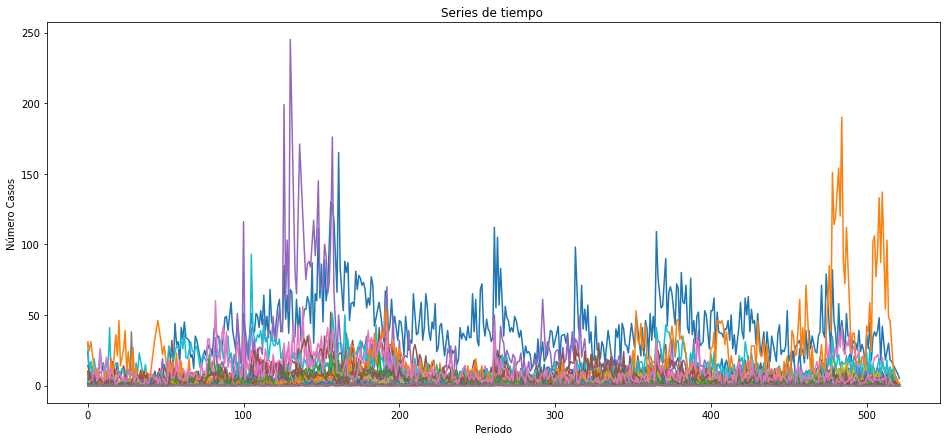

In [18]:
dept_list=df["departamento"].drop_duplicates().values

reframed_final=pd.DataFrame()
reframed_final_test=pd.DataFrame()
test_dept_dicc={}
for dept in dept_list:
    df_final=pd.DataFrame(df.query('departamento == @dept'))
    dff=pd.DataFrame()
    dff_full=pd.DataFrame()
        
    dff["periodo"]=df_final["periodo"]
    dff["casos_"]=df_final["casos_"]
    dff["Temperatura"]=df_final["Temperatura"]
    dff["Precipitación"]=df_final["Precipitación"]
    dff["EVI"]=df_final["EVI"]
    
    dff["DIMENSIÓN ECONOMICA"]=df_final["DIMENSIÓN ECONOMICA"]
    dff["DIMENSIÓN CALIDAD DE VIDA"]=df_final["DIMENSIÓN CALIDAD DE VIDA"]
    
    dff["Número de personas secuestradas"]=df_final["Número de personas secuestradas"]
    dff["Número de personas desplazadas"]=df_final["Número de personas desplazadas"]
    
    dff["Crecimiento_Pob"]=df_final["Crecimiento_Pob"]
    dff["Hectareas_Coca"]=df_final["Hectareas_Coca"]
    
    dff["total_poblacion"]=df_final["total_poblacion"]
    dff["DIMENSION URBANA "]=df_final["DIMENSION URBANA "]
    
    #NUEVOS
    dff["areakm2"]=df_final["areakm2"]
    dff["antropica"]=df_final["antropica"]

    dff["bosques"]=df_final["bosques"]
    dff["cultivos.permanentes"]=df_final["cultivos.permanentes"]

    dff["cultivos.transitorios"]=df_final["cultivos.transitorios"]
    dff["herbazales"]=df_final["herbazales"]
    
    dff["mosaico"]=df_final["mosaico"]
    dff["pastos"]=df_final["pastos"]
    
    dff["vegetacion.secundaria"]=df_final["vegetacion.secundaria"]
    dff["zonas.acuaticas"]=df_final["zonas.acuaticas"]

    dff["otras.coberturas"]=df_final["otras.coberturas"]
    dff["arido"]=df_final["arido"]

    dff["seco"]=df_final["seco"]
    dff["humedo"]=df_final["humedo"]

    dff["pluvial"]=df_final["pluvial"]
    dff["msnm"]=df_final["msnm"]
    
    dff["minmsnm"]=df_final["minmsnm"]
    dff["maxmsnm"]=df_final["maxmsnm"]
    
    dff["rango.msnm"]=df_final["rango.msnm"]
    dff["deforestacion05.16"]=df_final["deforestacion05.16"]
    
    dff["cuerpos.de.agua"]=df_final["cuerpos.de.agua"]
    dff["zos.inundables"]=df_final["zos.inundables"]

    dff["zos.susceptibles.de.inundacion"]=df_final["zos.susceptibles.de.inundacion"]
    dff["max.temperatura"]=df_final["max.temperatura"]

    dff["min.temperatura"]=df_final["min.temperatura"]
    dff["min.precipitacion"]=df_final["min.precipitacion"]
    
    dff["Cobertura neta en educación secundaria"]=df_final["Cobertura neta en educación secundaria"]
    dff["max.precipitacion"]=df_final["max.precipitacion"]
    
    dff["Puntaje promedio Pruebas Saber 11 - Lectura crítica"]=df_final["Puntaje promedio Pruebas Saber 11 - Lectura crítica"]
    dff["Tasa de mortalidad infantil en menores de 5 años "]=df_final["Tasa de mortalidad infantil en menores de 5 años "]

    dff["Cobertura vacunación pentavalente en menores de 1 año"]=df_final["Cobertura vacunación pentavalente en menores de 1 año"]
    dff["Cobertura de acueducto (REC)"]=df_final["Cobertura de acueducto (REC)"]

    dff["Densidad poblacional"]=df_final["Densidad poblacional"]
    dff["Ingresos totales per cápita"]=df_final["Ingresos totales per cápita"]

    dff["Tasa de homicidios (x cada 100.000 habitantes)"]=df_final["Tasa de homicidios (x cada 100.000 habitantes)"]
    dff["Tasa de hurtos (x cada 100.000 habitantes)"]=df_final["Tasa de hurtos (x cada 100.000 habitantes)"]
    
    dff["Disparidades_Económicas"]=df_final["Disparidades_Económicas"]
    dff["DIMENSIÓN SEGURIDAD"]=df_final["DIMENSIÓN SEGURIDAD"]
    
    #dff["promedio_poblacion"]=df_final["promedio_poblacion"]

    
    dff_full=dff
    
    plt.title('Series de tiempo ')
    plt.xlabel("Periodo")
    plt.ylabel("Número Casos")
    plt.plot(dff["casos_"].values)
    
    
    PASOS=6
    # convert series to supervised learning
    def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
        n_vars = 1 if type(data) is list else data.shape[1]
        df = pd.DataFrame(data)
        cols, names = list(), list()
        # input sequence (t-n, ... t-1)
        for i in range(n_in, 0, -1):
            cols.append(df.shift(i))
            names += [('casos_%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
            cols.append(df.shift(-i))
            if i == 0:
                names += [('casos_%d(t)' % (j+1)) for j in range(n_vars)]
            else:
                names += [('casos_%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
        # put it all together
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        # drop rows with NaN values
        if dropnan:
            agg.dropna(inplace=True)
        return agg
    
    
    def create_df_contextual(varible_name):
        # load dataset
        values77 = dff[varible_name].values
        # ensure all data is float
        values77 = values77.astype('float32')
        # normalize features
        values77=values77.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
        values_df_77=pd.DataFrame(values77)
        values_df_77.columns = [varible_name]    
        values_df_77 = values_df_77.iloc[:-6,:]

        return values_df_77

    # load dataset casos
    values = dff["casos_"].values
    # ensure all data is float
    values = values.astype('float32')

    # frame as supervised learning
    values=values.reshape(-1, 1)
    reframed = series_to_supervised(values, PASOS, 1)

    # load dataset temperatura
    values1 = dff["Temperatura"].values
    # ensure all data is float
    values1 = values1.astype('float32')
    # normalize features
    values1=values1.reshape(-1, 1)
    # frame as supervised learning
    reframed1 = series_to_supervised(values1, PASOS, 1)
    reframed1=reframed1.drop("casos_1(t)", axis=1)
    reframed1.rename(columns = {"casos_1(t-12)": "temp(t-12)", "casos_1(t-11)": "temp(t-11)", "casos_1(t-10)": "temp(t-10)", "casos_1(t-9)": "temp(t-9)",
                               "casos_1(t-8)": "temp(t-8)", "casos_1(t-7)": "temp(t-7)", "casos_1(t-6)": "temp(t-6)", "casos_1(t-5)": "temp(t-5)",
                                "casos_1(t-4)":"temp(t-4)", "casos_1(t-3)": "temp(t-3)", "casos_1(t-2)": "temp(t-2)", "casos_1(t-1)": "temp(t-1)"}, inplace = True) 

    
    # load dataset precipitacion
    values2 = dff["Precipitación"].values
    # ensure all data is float
    values2 = values2.astype('float32')
    # normalize features
    values2=values2.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
    # frame as supervised learning
    reframed2 = series_to_supervised(values2, PASOS, 1)
    reframed2=reframed2.drop("casos_1(t)", axis=1)
    reframed2.rename(columns = {"casos_1(t-12)": "prec(t-12)", "casos_1(t-11)": "prec(t-11)", "casos_1(t-10)": "prec(t-10)", "casos_1(t-9)": "prec(t-9)",
                               "casos_1(t-8)": "prec(t-8)", "casos_1(t-7)": "prec(t-7)", "casos_1(t-6)": "prec(t-6)", "casos_1(t-5)": "prec(t-5)", "casos_1(t-4)":"prec(t-4)",
                               "casos_1(t-3)": "prec(t-3)", "casos_1(t-2)": "prec(t-2)", "casos_1(t-1)": "prec(t-1)"}, inplace = True) 
    
    
    # load dataset EVI
    values3 = dff["EVI"].values
    # ensure all data is float
    values3 = values3.astype('float32')
    # normalize features
    values3=values3.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
    # frame as supervised learning
    reframed3 = series_to_supervised(values3, PASOS, 1)
    
    
    reframed3=reframed3.drop("casos_1(t)", axis=1)
    reframed3.rename(columns = {"casos_1(t-12)": "evi(t-12)", "casos_1(t-11)": "evi(t-11)", "casos_1(t-10)": "evi(t-10)", "casos_1(t-9)": "evi(t-9)",
                               "casos_1(t-8)": "evi(t-8)", "casos_1(t-7)": "evi(t-7)", "casos_1(t-6)": "evi(t-6)", "casos_1(t-5)": "evi(t-5)", 
                                "casos_1(t-4)":"evi(t-4)", "casos_1(t-3)": "evi(t-3)", "casos_1(t-2)": "evi(t-2)", "casos_1(t-1)": "evi(t-1)"}, inplace = True) 

    
    # load variables socieconomicas
    
    #value_df_4.drop(value_df_4.tail(6).index,inplace=True)    
    
    values4_df = create_df_contextual("DIMENSIÓN ECONOMICA")
    
    values5_df = create_df_contextual("DIMENSIÓN CALIDAD DE VIDA")
    
    values6_df = create_df_contextual("Número de personas secuestradas")
    
    values7_df = create_df_contextual("Número de personas desplazadas")
    
    values8_df = create_df_contextual("Crecimiento_Pob")
    
    values9_df = create_df_contextual("Hectareas_Coca")
    
    values10_df = create_df_contextual("total_poblacion")
    
    values11_df = create_df_contextual("DIMENSION URBANA ")
    
    values12_df = create_df_contextual("areakm2")
    
    values13_df = create_df_contextual("antropica")
    
    values14_df = create_df_contextual("bosques")
    
    values15_df = create_df_contextual("cultivos.transitorios")
    
    values16_df = create_df_contextual("herbazales")
    
    values17_df = create_df_contextual("mosaico")
    
    values18_df = create_df_contextual("pastos")
    
    values19_df = create_df_contextual("vegetacion.secundaria")
    
    values20_df = create_df_contextual("zonas.acuaticas")
    
    values21_df = create_df_contextual("otras.coberturas")
    
    values22_df = create_df_contextual("arido")
    
    values23_df = create_df_contextual("seco")
    
    values24_df = create_df_contextual("humedo")
    
    values25_df = create_df_contextual("pluvial")
    
    values26_df = create_df_contextual("msnm")
    
    values27_df = create_df_contextual("minmsnm")

    values28_df = create_df_contextual("maxmsnm")
    
    values29_df = create_df_contextual("rango.msnm")

    values30_df = create_df_contextual("deforestacion05.16")
    
    values31_df = create_df_contextual("cuerpos.de.agua")

    values32_df = create_df_contextual("zos.inundables")
    
    values33_df = create_df_contextual("zos.susceptibles.de.inundacion")

    values34_df = create_df_contextual("max.temperatura")
    
    values35_df = create_df_contextual("min.temperatura")

    values36_df = create_df_contextual("Cobertura neta en educación secundaria")
    
    values37_df = create_df_contextual("Puntaje promedio Pruebas Saber 11 - Lectura crítica")

    values38_df = create_df_contextual("Cobertura vacunación pentavalente en menores de 1 año")
    
    values39_df = create_df_contextual("Densidad poblacional")

    values40_df = create_df_contextual("Tasa de homicidios (x cada 100.000 habitantes)")
    
    values41_df = create_df_contextual("min.precipitacion")

    values42_df = create_df_contextual("max.precipitacion")
    
    values43_df = create_df_contextual("Tasa de mortalidad infantil en menores de 5 años ")

    values44_df = create_df_contextual("Cobertura de acueducto (REC)")
    
    values45_df = create_df_contextual("Tasa de hurtos (x cada 100.000 habitantes)")

    values46_df = create_df_contextual("Disparidades_Económicas")
    
    values47_df = create_df_contextual("DIMENSIÓN SEGURIDAD")

    
    result = pd.concat([values4_df.reset_index(drop=True),values5_df.reset_index(drop=True), values6_df.reset_index(drop=True),
                        values7_df.reset_index(drop=True),values8_df.reset_index(drop=True), values9_df.reset_index(drop=True), 
                        values10_df.reset_index(drop=True),values11_df.reset_index(drop=True), values12_df.reset_index(drop=True),
                        values13_df.reset_index(drop=True),values14_df.reset_index(drop=True), values15_df.reset_index(drop=True),    
                        values16_df.reset_index(drop=True),values17_df.reset_index(drop=True), values18_df.reset_index(drop=True),
                        values19_df.reset_index(drop=True),values20_df.reset_index(drop=True), values21_df.reset_index(drop=True),
                        values22_df.reset_index(drop=True),values23_df.reset_index(drop=True), values24_df.reset_index(drop=True),
                        values25_df.reset_index(drop=True),values26_df.reset_index(drop=True), values27_df.reset_index(drop=True),
                        values28_df.reset_index(drop=True),values29_df.reset_index(drop=True), values30_df.reset_index(drop=True),
                        values31_df.reset_index(drop=True),values32_df.reset_index(drop=True), values33_df.reset_index(drop=True),
                        values34_df.reset_index(drop=True),values35_df.reset_index(drop=True), values36_df.reset_index(drop=True),
                        values37_df.reset_index(drop=True),values38_df.reset_index(drop=True), values39_df.reset_index(drop=True),
                        values40_df.reset_index(drop=True),values41_df.reset_index(drop=True), values42_df.reset_index(drop=True),
                        values43_df.reset_index(drop=True),values44_df.reset_index(drop=True), values45_df.reset_index(drop=True),
                        values46_df.reset_index(drop=True),values47_df.reset_index(drop=True),
                        
                        reframed3.reset_index(drop=True), reframed2.reset_index(drop=True), 
                    reframed1.reset_index(drop=True), reframed.reset_index(drop=True)], axis=1)

    reframed=result
    # split into train and test sets
    values = reframed
    
    #316 mas test 418 menos test
    n_train_days = 316
    #n_train_days = 418

    train = values.iloc[:n_train_days, :]
    test = values.iloc[n_train_days:, :]
    
    reframed_final = pd.concat([reframed_final, train])     
    reframed_final.index = range(reframed_final.shape[0])
    test_dept_dicc[dept]=test
    reframed_final_test = pd.concat([reframed_final_test, test])
    reframed_final_test.index = range(reframed_final_test.shape[0])
    
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
#values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(reframed_final.values)

scaled_test=scaler.transform(reframed_final_test.values)
    
for dept in dept_list:
    test_dept_dicc[dept]=pd.DataFrame(scaler.transform(test_dept_dicc[dept].values))
    
# split into input and outputs
x_train, y_train = scaled[:, :-1], scaled[:, -1]
x_val, y_val = scaled_test[:, :-1], scaled_test[:, -1]

x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

#Lo nuevo con validación 60, 20, 20
x_val2, x_test=np.split(x_val, 2)
print(x_val2.shape, x_test.shape)

y_val2, y_test=np.split(y_val, 2)
print(y_val2.shape, y_test.shape)



In [10]:
reframed_final.columns

Index(['DIMENSIÓN ECONOMICA', 'DIMENSIÓN CALIDAD DE VIDA',
       'Número de personas secuestradas', 'Número de personas desplazadas',
       'Crecimiento_Pob', 'Hectareas_Coca', 'total_poblacion',
       'DIMENSION URBANA ', 'areakm2', 'antropica', 'bosques',
       'cultivos.transitorios', 'herbazales', 'mosaico', 'pastos',
       'vegetacion.secundaria', 'zonas.acuaticas', 'otras.coberturas', 'arido',
       'seco', 'humedo', 'pluvial', 'msnm', 'minmsnm', 'maxmsnm', 'rango.msnm',
       'deforestacion05.16', 'cuerpos.de.agua', 'zos.inundables',
       'zos.susceptibles.de.inundacion', 'max.temperatura', 'min.temperatura',
       'Cobertura neta en educación secundaria',
       'Puntaje promedio Pruebas Saber 11 - Lectura crítica',
       'Cobertura vacunación pentavalente en menores de 1 año',
       'Densidad poblacional',
       'Tasa de homicidios (x cada 100.000 habitantes)', 'min.precipitacion',
       'max.precipitacion',
       'Tasa de mortalidad infantil en menores de 5 año

In [11]:
columns_final =reframed_final.columns[:-1]
columns_final

Index(['DIMENSIÓN ECONOMICA', 'DIMENSIÓN CALIDAD DE VIDA',
       'Número de personas secuestradas', 'Número de personas desplazadas',
       'Crecimiento_Pob', 'Hectareas_Coca', 'total_poblacion',
       'DIMENSION URBANA ', 'areakm2', 'antropica', 'bosques',
       'cultivos.transitorios', 'herbazales', 'mosaico', 'pastos',
       'vegetacion.secundaria', 'zonas.acuaticas', 'otras.coberturas', 'arido',
       'seco', 'humedo', 'pluvial', 'msnm', 'minmsnm', 'maxmsnm', 'rango.msnm',
       'deforestacion05.16', 'cuerpos.de.agua', 'zos.inundables',
       'zos.susceptibles.de.inundacion', 'max.temperatura', 'min.temperatura',
       'Cobertura neta en educación secundaria',
       'Puntaje promedio Pruebas Saber 11 - Lectura crítica',
       'Cobertura vacunación pentavalente en menores de 1 año',
       'Densidad poblacional',
       'Tasa de homicidios (x cada 100.000 habitantes)', 'min.precipitacion',
       'max.precipitacion',
       'Tasa de mortalidad infantil en menores de 5 año

# TUNING KERAS - RandomizedSearchCV

#### Numero de capas y activacion

In [12]:
def tune_layers_model(hp):
    model = keras.Sequential()
    
    activation = hp.Choice('activation',
                        [
                          'softmax',
                          'softplus',
                          'softsign',
                          'relu',
                          'tanh',
                          'sigmoid',
                          'hard_sigmoid',
                          'linear'
                        ])
    batch_size= hp.Choice('batch_size',[2,4,8,16,32,128,512])
    model.add(keras.layers.Dense(units=68,
                                 activation=activation,
                                 input_shape=[x_train.shape[2]]))
    for i in range(hp.Int('num_layers', 1, 18)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=1,
                                            max_value=50,
                                            step=1),
                               activation=activation))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    #optimizer = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])
    lr = hp.Choice('learning_rate', [1e-1, 1e-2, 1e-3, 1e-4])
    momentum = hp.Choice('momentum', [0.6, 0.7, 0.8, 0.9])
    
    model.compile(
        optimizer=keras.optimizers.SGD(lr=lr, momentum=momentum),
        loss = 'mse',
        metrics = ['mse'])
    return model

In [33]:
MAX_TRIALS = 10
EXECUTIONS_PER_TRIAL = 5
tuner6 = RandomSearch(
    tune_layers_model,
    objective='mse',
    max_trials=MAX_TRIALS,
    executions_per_trial=EXECUTIONS_PER_TRIAL,
    directory='test_dir',
    project_name='tune_optimizer_6',
    seed=7
)

In [34]:
nsamples, nx, ny = x_train.shape
x_train_new = x_train.reshape((nsamples,nx*ny))

nsamples_x_val, nx_val, ny_val = x_val.shape
x_val_new = x_val.reshape((nsamples_x_val,nx_val*ny_val))

print("x_train_new.shape ", x_train_new.shape)
print("x_val_new.shape ", x_val_new.shape)

print("y_train_.shape ", y_train.shape)
print("y_val.shape ", y_val.shape)


TRAIN_EPOCHS = 10
tuner6.search(x=x_train_new,
             y=y_train,
             epochs=TRAIN_EPOCHS,
             workers=8,
             validation_data=(x_val_new, y_val))

x_train_new.shape  (9408, 68)
x_val_new.shape  (5040, 68)
y_train_.shape  (9408,)
y_val.shape  (5040,)
Train on 9408 samples, validate on 5040 samples
Epoch 1/10
9408/9408 [==============================] - ETA: 2:36 - loss: 2.8716 - mse: 2.871 - ETA: 4s - loss: 2.8549 - mse: 2.8549  - ETA: 2s - loss: 2.8475 - mse: 2.847 - ETA: 1s - loss: 2.8380 - mse: 2.838 - ETA: 0s - loss: 2.8287 - mse: 2.828 - ETA: 0s - loss: 2.8158 - mse: 2.815 - ETA: 0s - loss: 2.8046 - mse: 2.804 - ETA: 0s - loss: 2.7919 - mse: 2.792 - ETA: 0s - loss: 2.7802 - mse: 2.780 - ETA: 0s - loss: 2.7668 - mse: 2.766 - 1s 142us/sample - loss: 2.7647 - mse: 2.7647 - val_loss: 2.6532 - val_mse: 2.6532
Epoch 2/10
9408/9408 [==============================] - ETA: 1s - loss: 2.6300 - mse: 2.630 - ETA: 0s - loss: 2.6261 - mse: 2.626 - ETA: 0s - loss: 2.6185 - mse: 2.618 - ETA: 0s - loss: 2.6036 - mse: 2.603 - ETA: 0s - loss: 2.5906 - mse: 2.590 - ETA: 0s - loss: 2.5769 - mse: 2.576 - ETA: 0s - loss: 2.5673 - mse: 2.567 - ETA: 

Epoch 4/10
9408/9408 [==============================] - ETA: 0s - loss: 1.4936 - mse: 1.493 - ETA: 0s - loss: 1.4498 - mse: 1.449 - ETA: 0s - loss: 1.4454 - mse: 1.445 - ETA: 0s - loss: 1.4431 - mse: 1.443 - ETA: 0s - loss: 1.4393 - mse: 1.439 - ETA: 0s - loss: 1.4341 - mse: 1.434 - ETA: 0s - loss: 1.4293 - mse: 1.429 - ETA: 0s - loss: 1.4241 - mse: 1.424 - ETA: 0s - loss: 1.4200 - mse: 1.420 - 1s 63us/sample - loss: 1.4196 - mse: 1.4196 - val_loss: 1.3823 - val_mse: 1.3823
Epoch 5/10
9408/9408 [==============================] - ETA: 4s - loss: 1.3262 - mse: 1.326 - ETA: 0s - loss: 1.3771 - mse: 1.377 - ETA: 0s - loss: 1.3718 - mse: 1.371 - ETA: 0s - loss: 1.3690 - mse: 1.369 - ETA: 0s - loss: 1.3647 - mse: 1.364 - ETA: 0s - loss: 1.3607 - mse: 1.360 - ETA: 0s - loss: 1.3562 - mse: 1.356 - ETA: 0s - loss: 1.3531 - mse: 1.353 - ETA: 0s - loss: 1.3509 - mse: 1.350 - 1s 66us/sample - loss: 1.3486 - mse: 1.3486 - val_loss: 1.3191 - val_mse: 1.3191
Epoch 6/10
9408/9408 [====================

Train on 9408 samples, validate on 5040 samples
Epoch 1/10
9408/9408 [==============================] - ETA: 3:37 - loss: 2.1481 - mse: 2.148 - ETA: 8s - loss: 2.0754 - mse: 2.0754  - ETA: 3s - loss: 2.0169 - mse: 2.016 - ETA: 2s - loss: 1.9814 - mse: 1.981 - ETA: 1s - loss: 1.9536 - mse: 1.953 - ETA: 1s - loss: 1.9367 - mse: 1.936 - ETA: 0s - loss: 1.9220 - mse: 1.922 - ETA: 0s - loss: 1.9083 - mse: 1.908 - ETA: 0s - loss: 1.8967 - mse: 1.896 - ETA: 0s - loss: 1.8871 - mse: 1.887 - ETA: 0s - loss: 1.8787 - mse: 1.878 - ETA: 0s - loss: 1.8705 - mse: 1.870 - 2s 185us/sample - loss: 1.8697 - mse: 1.8697 - val_loss: 1.7920 - val_mse: 1.7920
Epoch 2/10
9408/9408 [==============================] - ETA: 0s - loss: 1.7301 - mse: 1.730 - ETA: 0s - loss: 1.7929 - mse: 1.792 - ETA: 0s - loss: 1.7835 - mse: 1.783 - ETA: 0s - loss: 1.7752 - mse: 1.775 - ETA: 0s - loss: 1.7728 - mse: 1.772 - ETA: 0s - loss: 1.7670 - mse: 1.767 - ETA: 0s - loss: 1.7652 - mse: 1.765 - ETA: 0s - loss: 1.7637 - mse: 1.

9408/9408 [==============================] - ETA: 0s - loss: 1.6043 - mse: 1.604 - ETA: 0s - loss: 1.6005 - mse: 1.600 - ETA: 0s - loss: 1.5961 - mse: 1.596 - ETA: 0s - loss: 1.5974 - mse: 1.597 - ETA: 0s - loss: 1.5963 - mse: 1.596 - ETA: 0s - loss: 1.5948 - mse: 1.594 - ETA: 0s - loss: 1.5927 - mse: 1.592 - ETA: 0s - loss: 1.5893 - mse: 1.589 - ETA: 0s - loss: 1.5872 - mse: 1.587 - ETA: 0s - loss: 1.5837 - mse: 1.583 - ETA: 0s - loss: 1.5821 - mse: 1.582 - 1s 81us/sample - loss: 1.5792 - mse: 1.5792 - val_loss: 1.5549 - val_mse: 1.5549
Epoch 8/10
9408/9408 [==============================] - ETA: 1s - loss: 1.5134 - mse: 1.513 - ETA: 0s - loss: 1.5458 - mse: 1.545 - ETA: 0s - loss: 1.5466 - mse: 1.546 - ETA: 0s - loss: 1.5500 - mse: 1.550 - ETA: 0s - loss: 1.5459 - mse: 1.545 - ETA: 0s - loss: 1.5447 - mse: 1.544 - ETA: 0s - loss: 1.5424 - mse: 1.542 - ETA: 0s - loss: 1.5381 - mse: 1.538 - ETA: 0s - loss: 1.5361 - mse: 1.536 - ETA: 0s - loss: 1.5340 - mse: 1.534 - ETA: 0s - loss: 1.53

Train on 9408 samples, validate on 5040 samples
Epoch 1/10
9408/9408 [==============================] - ETA: 3:37 - loss: 2.0741 - mse: 2.074 - ETA: 8s - loss: 2.0752 - mse: 2.0752  - ETA: 4s - loss: 2.0636 - mse: 2.063 - ETA: 2s - loss: 2.0560 - mse: 2.056 - ETA: 1s - loss: 2.0409 - mse: 2.040 - ETA: 1s - loss: 2.0314 - mse: 2.031 - ETA: 1s - loss: 2.0199 - mse: 2.019 - ETA: 0s - loss: 2.0095 - mse: 2.009 - ETA: 0s - loss: 1.9988 - mse: 1.998 - ETA: 0s - loss: 1.9865 - mse: 1.986 - ETA: 0s - loss: 1.9773 - mse: 1.977 - ETA: 0s - loss: 1.9675 - mse: 1.967 - 2s 182us/sample - loss: 1.9625 - mse: 1.9625 - val_loss: 1.8481 - val_mse: 1.8482
Epoch 2/10
9408/9408 [==============================] - ETA: 0s - loss: 1.8669 - mse: 1.866 - ETA: 0s - loss: 1.8284 - mse: 1.828 - ETA: 0s - loss: 1.8227 - mse: 1.822 - ETA: 0s - loss: 1.8178 - mse: 1.817 - ETA: 0s - loss: 1.8119 - mse: 1.811 - ETA: 0s - loss: 1.8029 - mse: 1.802 - ETA: 0s - loss: 1.7968 - mse: 1.796 - ETA: 0s - loss: 1.7889 - mse: 1.

Train on 9408 samples, validate on 5040 samples
Epoch 1/10
9408/9408 [==============================] - ETA: 2:31 - loss: 1.7891 - mse: 1.789 - ETA: 4s - loss: 0.9317 - mse: 0.9317  - ETA: 2s - loss: 0.9216 - mse: 0.921 - ETA: 1s - loss: 0.9202 - mse: 0.920 - ETA: 0s - loss: 0.9173 - mse: 0.917 - ETA: 0s - loss: 0.9160 - mse: 0.916 - ETA: 0s - loss: 0.9152 - mse: 0.915 - ETA: 0s - loss: 0.9152 - mse: 0.915 - ETA: 0s - loss: 0.9142 - mse: 0.914 - ETA: 0s - loss: 0.9139 - mse: 0.913 - 1s 141us/sample - loss: 0.9136 - mse: 0.9136 - val_loss: 0.9114 - val_mse: 0.9114
Epoch 2/10
9408/9408 [==============================] - ETA: 0s - loss: 0.9331 - mse: 0.933 - ETA: 0s - loss: 0.9165 - mse: 0.916 - ETA: 0s - loss: 0.9072 - mse: 0.907 - ETA: 0s - loss: 0.9080 - mse: 0.908 - ETA: 0s - loss: 0.9077 - mse: 0.907 - ETA: 0s - loss: 0.9096 - mse: 0.909 - ETA: 0s - loss: 0.9100 - mse: 0.910 - ETA: 0s - loss: 0.9101 - mse: 0.910 - ETA: 0s - loss: 0.9103 - mse: 0.910 - ETA: 0s - loss: 0.9110 - mse: 0.

Epoch 3/10
9408/9408 [==============================] - ETA: 0s - loss: 0.9446 - mse: 0.944 - ETA: 0s - loss: 0.9035 - mse: 0.903 - ETA: 0s - loss: 0.9077 - mse: 0.907 - ETA: 0s - loss: 0.9084 - mse: 0.908 - ETA: 0s - loss: 0.9096 - mse: 0.909 - ETA: 0s - loss: 0.9107 - mse: 0.910 - ETA: 0s - loss: 0.9102 - mse: 0.910 - ETA: 0s - loss: 0.9102 - mse: 0.910 - ETA: 0s - loss: 0.9104 - mse: 0.910 - ETA: 0s - loss: 0.9104 - mse: 0.910 - 1s 68us/sample - loss: 0.9106 - mse: 0.9106 - val_loss: 0.9114 - val_mse: 0.9114
Epoch 4/10
9408/9408 [==============================] - ETA: 0s - loss: 0.9349 - mse: 0.934 - ETA: 0s - loss: 0.9093 - mse: 0.909 - ETA: 0s - loss: 0.9090 - mse: 0.909 - ETA: 0s - loss: 0.9084 - mse: 0.908 - ETA: 0s - loss: 0.9086 - mse: 0.908 - ETA: 0s - loss: 0.9083 - mse: 0.908 - ETA: 0s - loss: 0.9084 - mse: 0.908 - ETA: 0s - loss: 0.9092 - mse: 0.909 - ETA: 0s - loss: 0.9096 - mse: 0.909 - 1s 67us/sample - loss: 0.9106 - mse: 0.9106 - val_loss: 0.9114 - val_mse: 0.9114
Epoc

Train on 9408 samples, validate on 5040 samples
Epoch 1/10
9408/9408 [==============================] - ETA: 1:59 - loss: 1.7927 - mse: 1.792 - ETA: 3s - loss: 1.1238 - mse: 1.1238  - ETA: 1s - loss: 1.0373 - mse: 1.037 - ETA: 1s - loss: 1.0023 - mse: 1.002 - ETA: 0s - loss: 0.9833 - mse: 0.983 - ETA: 0s - loss: 0.9700 - mse: 0.970 - ETA: 0s - loss: 0.9605 - mse: 0.960 - ETA: 0s - loss: 0.9544 - mse: 0.954 - ETA: 0s - loss: 0.9485 - mse: 0.948 - 1s 123us/sample - loss: 0.9450 - mse: 0.9450 - val_loss: 0.9147 - val_mse: 0.9147
Epoch 2/10
9408/9408 [==============================] - ETA: 0s - loss: 0.9160 - mse: 0.916 - ETA: 0s - loss: 0.9155 - mse: 0.915 - ETA: 0s - loss: 0.9177 - mse: 0.917 - ETA: 0s - loss: 0.9156 - mse: 0.915 - ETA: 0s - loss: 0.9150 - mse: 0.915 - ETA: 0s - loss: 0.9157 - mse: 0.915 - ETA: 0s - loss: 0.9134 - mse: 0.913 - ETA: 0s - loss: 0.9125 - mse: 0.912 - ETA: 0s - loss: 0.9127 - mse: 0.912 - 1s 69us/sample - loss: 0.9126 - mse: 0.9126 - val_loss: 0.9126 - val_m

9408/9408 [==============================] - ETA: 1s - loss: 0.8768 - mse: 0.876 - ETA: 0s - loss: 0.9123 - mse: 0.912 - ETA: 0s - loss: 0.9095 - mse: 0.909 - ETA: 0s - loss: 0.9085 - mse: 0.908 - ETA: 0s - loss: 0.9093 - mse: 0.909 - ETA: 0s - loss: 0.9101 - mse: 0.910 - ETA: 0s - loss: 0.9109 - mse: 0.910 - ETA: 0s - loss: 0.9112 - mse: 0.911 - ETA: 0s - loss: 0.9105 - mse: 0.910 - ETA: 0s - loss: 0.9107 - mse: 0.910 - 1s 74us/sample - loss: 0.9110 - mse: 0.9110 - val_loss: 0.9117 - val_mse: 0.9117
Epoch 4/10
9408/9408 [==============================] - ETA: 0s - loss: 0.9299 - mse: 0.929 - ETA: 0s - loss: 0.9131 - mse: 0.913 - ETA: 0s - loss: 0.9109 - mse: 0.910 - ETA: 0s - loss: 0.9104 - mse: 0.910 - ETA: 0s - loss: 0.9107 - mse: 0.910 - ETA: 0s - loss: 0.9117 - mse: 0.911 - ETA: 0s - loss: 0.9110 - mse: 0.911 - ETA: 0s - loss: 0.9106 - mse: 0.910 - ETA: 0s - loss: 0.9109 - mse: 0.910 - ETA: 0s - loss: 0.9108 - mse: 0.910 - 1s 71us/sample - loss: 0.9108 - mse: 0.9108 - val_loss: 0.

Train on 9408 samples, validate on 5040 samples
Epoch 1/10
9408/9408 [==============================] - ETA: 2:05 - loss: 3.2187 - mse: 3.218 - ETA: 3s - loss: 3.2968 - mse: 3.2968  - ETA: 1s - loss: 3.2916 - mse: 3.291 - ETA: 1s - loss: 3.2759 - mse: 3.275 - ETA: 0s - loss: 3.2606 - mse: 3.260 - ETA: 0s - loss: 3.2467 - mse: 3.246 - ETA: 0s - loss: 3.2333 - mse: 3.233 - ETA: 0s - loss: 3.2156 - mse: 3.215 - ETA: 0s - loss: 3.2008 - mse: 3.200 - 1s 125us/sample - loss: 3.1901 - mse: 3.1901 - val_loss: 3.0276 - val_mse: 3.0276
Epoch 2/10
9408/9408 [==============================] - ETA: 0s - loss: 2.9686 - mse: 2.968 - ETA: 0s - loss: 3.0032 - mse: 3.003 - ETA: 0s - loss: 2.9803 - mse: 2.980 - ETA: 0s - loss: 2.9509 - mse: 2.950 - ETA: 0s - loss: 2.9241 - mse: 2.924 - ETA: 0s - loss: 2.8959 - mse: 2.895 - ETA: 0s - loss: 2.8641 - mse: 2.864 - ETA: 0s - loss: 2.8318 - mse: 2.831 - ETA: 0s - loss: 2.8007 - mse: 2.800 - 1s 69us/sample - loss: 2.7788 - mse: 2.7788 - val_loss: 2.4893 - val_m

Epoch 4/10
9408/9408 [==============================] - ETA: 0s - loss: 1.3356 - mse: 1.335 - ETA: 0s - loss: 1.3252 - mse: 1.325 - ETA: 0s - loss: 1.3187 - mse: 1.318 - ETA: 0s - loss: 1.3074 - mse: 1.307 - ETA: 0s - loss: 1.2987 - mse: 1.298 - ETA: 0s - loss: 1.2915 - mse: 1.291 - ETA: 0s - loss: 1.2843 - mse: 1.284 - ETA: 0s - loss: 1.2775 - mse: 1.277 - ETA: 0s - loss: 1.2695 - mse: 1.269 - 1s 64us/sample - loss: 1.2669 - mse: 1.2669 - val_loss: 1.2095 - val_mse: 1.2095
Epoch 5/10
9408/9408 [==============================] - ETA: 0s - loss: 1.1753 - mse: 1.175 - ETA: 0s - loss: 1.2028 - mse: 1.202 - ETA: 0s - loss: 1.2011 - mse: 1.201 - ETA: 0s - loss: 1.1940 - mse: 1.194 - ETA: 0s - loss: 1.1889 - mse: 1.188 - ETA: 0s - loss: 1.1848 - mse: 1.184 - ETA: 0s - loss: 1.1788 - mse: 1.178 - ETA: 0s - loss: 1.1745 - mse: 1.174 - ETA: 0s - loss: 1.1704 - mse: 1.170 - 1s 64us/sample - loss: 1.1689 - mse: 1.1689 - val_loss: 1.1362 - val_mse: 1.1362
Epoch 6/10
9408/9408 [====================

Train on 9408 samples, validate on 5040 samples
Epoch 1/10
9408/9408 [==============================] - ETA: 3:10 - loss: 1.9764 - mse: 1.976 - ETA: 7s - loss: 0.9979 - mse: 0.9979  - ETA: 3s - loss: 0.9548 - mse: 0.954 - ETA: 2s - loss: 0.9442 - mse: 0.944 - ETA: 1s - loss: 0.9361 - mse: 0.936 - ETA: 1s - loss: 0.9304 - mse: 0.930 - ETA: 0s - loss: 0.9270 - mse: 0.927 - ETA: 0s - loss: 0.9238 - mse: 0.923 - ETA: 0s - loss: 0.9223 - mse: 0.922 - ETA: 0s - loss: 0.9208 - mse: 0.920 - ETA: 0s - loss: 0.9191 - mse: 0.919 - ETA: 0s - loss: 0.9189 - mse: 0.918 - 2s 171us/sample - loss: 0.9186 - mse: 0.9186 - val_loss: 0.9114 - val_mse: 0.9114
Epoch 2/10
9408/9408 [==============================] - ETA: 0s - loss: 0.9164 - mse: 0.916 - ETA: 0s - loss: 0.9136 - mse: 0.913 - ETA: 0s - loss: 0.9142 - mse: 0.914 - ETA: 0s - loss: 0.9135 - mse: 0.913 - ETA: 0s - loss: 0.9131 - mse: 0.913 - ETA: 0s - loss: 0.9133 - mse: 0.913 - ETA: 0s - loss: 0.9127 - mse: 0.912 - ETA: 0s - loss: 0.9115 - mse: 0.

9408/9408 [==============================] - ETA: 1s - loss: 0.8680 - mse: 0.868 - ETA: 0s - loss: 0.9035 - mse: 0.903 - ETA: 0s - loss: 0.9084 - mse: 0.908 - ETA: 0s - loss: 0.9095 - mse: 0.909 - ETA: 0s - loss: 0.9085 - mse: 0.908 - ETA: 0s - loss: 0.9101 - mse: 0.910 - ETA: 0s - loss: 0.9108 - mse: 0.910 - ETA: 0s - loss: 0.9115 - mse: 0.911 - ETA: 0s - loss: 0.9114 - mse: 0.911 - ETA: 0s - loss: 0.9107 - mse: 0.910 - ETA: 0s - loss: 0.9106 - mse: 0.910 - ETA: 0s - loss: 0.9108 - mse: 0.910 - 1s 86us/sample - loss: 0.9106 - mse: 0.9106 - val_loss: 0.9114 - val_mse: 0.9114
Epoch 8/10
9408/9408 [==============================] - ETA: 1s - loss: 0.9188 - mse: 0.918 - ETA: 0s - loss: 0.9025 - mse: 0.902 - ETA: 0s - loss: 0.9065 - mse: 0.906 - ETA: 0s - loss: 0.9086 - mse: 0.908 - ETA: 0s - loss: 0.9100 - mse: 0.910 - ETA: 0s - loss: 0.9110 - mse: 0.911 - ETA: 0s - loss: 0.9115 - mse: 0.911 - ETA: 0s - loss: 0.9116 - mse: 0.911 - ETA: 0s - loss: 0.9117 - mse: 0.911 - ETA: 0s - loss: 0.91

Train on 9408 samples, validate on 5040 samples
Epoch 1/10
9408/9408 [==============================] - ETA: 2:21 - loss: 2.3648 - mse: 2.364 - ETA: 4s - loss: 2.1539 - mse: 2.1539  - ETA: 2s - loss: 1.9731 - mse: 1.973 - ETA: 1s - loss: 1.8225 - mse: 1.822 - ETA: 0s - loss: 1.7116 - mse: 1.711 - ETA: 0s - loss: 1.6173 - mse: 1.617 - ETA: 0s - loss: 1.5483 - mse: 1.548 - ETA: 0s - loss: 1.4885 - mse: 1.488 - ETA: 0s - loss: 1.4360 - mse: 1.436 - ETA: 0s - loss: 1.3911 - mse: 1.391 - 1s 139us/sample - loss: 1.3725 - mse: 1.3725 - val_loss: 1.0269 - val_mse: 1.0269
Epoch 2/10
9408/9408 [==============================] - ETA: 0s - loss: 1.0572 - mse: 1.057 - ETA: 0s - loss: 1.0213 - mse: 1.021 - ETA: 0s - loss: 1.0158 - mse: 1.015 - ETA: 0s - loss: 1.0062 - mse: 1.006 - ETA: 0s - loss: 1.0001 - mse: 1.000 - ETA: 0s - loss: 0.9962 - mse: 0.996 - ETA: 0s - loss: 0.9911 - mse: 0.991 - ETA: 0s - loss: 0.9869 - mse: 0.986 - ETA: 0s - loss: 0.9831 - mse: 0.983 - 1s 71us/sample - loss: 0.9803 - 

9408/9408 [==============================] - ETA: 0s - loss: 0.9165 - mse: 0.916 - ETA: 0s - loss: 0.9511 - mse: 0.951 - ETA: 0s - loss: 0.9494 - mse: 0.949 - ETA: 0s - loss: 0.9474 - mse: 0.947 - ETA: 0s - loss: 0.9457 - mse: 0.945 - ETA: 0s - loss: 0.9445 - mse: 0.944 - ETA: 0s - loss: 0.9432 - mse: 0.943 - ETA: 0s - loss: 0.9430 - mse: 0.943 - ETA: 0s - loss: 0.9429 - mse: 0.942 - 1s 67us/sample - loss: 0.9414 - mse: 0.9414 - val_loss: 0.9354 - val_mse: 0.9354
Epoch 4/10
9408/9408 [==============================] - ETA: 0s - loss: 0.9263 - mse: 0.926 - ETA: 0s - loss: 0.9324 - mse: 0.932 - ETA: 0s - loss: 0.9374 - mse: 0.937 - ETA: 0s - loss: 0.9352 - mse: 0.935 - ETA: 0s - loss: 0.9342 - mse: 0.934 - ETA: 0s - loss: 0.9329 - mse: 0.932 - ETA: 0s - loss: 0.9318 - mse: 0.931 - ETA: 0s - loss: 0.9314 - mse: 0.931 - ETA: 0s - loss: 0.9309 - mse: 0.930 - 1s 68us/sample - loss: 0.9306 - mse: 0.9306 - val_loss: 0.9282 - val_mse: 0.9282
Epoch 5/10
9408/9408 [==============================]

Train on 9408 samples, validate on 5040 samples
Epoch 1/10
9408/9408 [==============================] - ETA: 1:39 - loss: 1.2543 - mse: 1.254 - ETA: 5s - loss: 0.9197 - mse: 0.9197  - ETA: 3s - loss: 0.9157 - mse: 0.915 - ETA: 1s - loss: 0.9119 - mse: 0.911 - ETA: 1s - loss: 0.9109 - mse: 0.910 - ETA: 0s - loss: 0.9111 - mse: 0.911 - ETA: 0s - loss: 0.9122 - mse: 0.912 - ETA: 0s - loss: 0.9133 - mse: 0.913 - ETA: 0s - loss: 0.9128 - mse: 0.912 - ETA: 0s - loss: 0.9117 - mse: 0.911 - 1s 120us/sample - loss: 0.9119 - mse: 0.9119 - val_loss: 0.9114 - val_mse: 0.9114
Epoch 2/10
9408/9408 [==============================] - ETA: 0s - loss: 0.9342 - mse: 0.934 - ETA: 0s - loss: 0.9059 - mse: 0.905 - ETA: 0s - loss: 0.9046 - mse: 0.904 - ETA: 0s - loss: 0.9049 - mse: 0.904 - ETA: 0s - loss: 0.9058 - mse: 0.905 - ETA: 0s - loss: 0.9084 - mse: 0.908 - ETA: 0s - loss: 0.9092 - mse: 0.909 - ETA: 0s - loss: 0.9101 - mse: 0.910 - ETA: 0s - loss: 0.9101 - mse: 0.910 - ETA: 0s - loss: 0.9106 - mse: 0.

9408/9408 [==============================] - ETA: 0s - loss: 0.8607 - mse: 0.860 - ETA: 0s - loss: 0.9049 - mse: 0.904 - ETA: 0s - loss: 0.9075 - mse: 0.907 - ETA: 0s - loss: 0.9084 - mse: 0.908 - ETA: 0s - loss: 0.9090 - mse: 0.909 - ETA: 0s - loss: 0.9108 - mse: 0.910 - ETA: 0s - loss: 0.9115 - mse: 0.911 - ETA: 0s - loss: 0.9117 - mse: 0.911 - ETA: 0s - loss: 0.9109 - mse: 0.910 - 1s 71us/sample - loss: 0.9106 - mse: 0.9106 - val_loss: 0.9114 - val_mse: 0.9114
Epoch 4/10
9408/9408 [==============================] - ETA: 1s - loss: 0.8992 - mse: 0.899 - ETA: 0s - loss: 0.9119 - mse: 0.911 - ETA: 0s - loss: 0.9108 - mse: 0.910 - ETA: 0s - loss: 0.9093 - mse: 0.909 - ETA: 0s - loss: 0.9080 - mse: 0.908 - ETA: 0s - loss: 0.9081 - mse: 0.908 - ETA: 0s - loss: 0.9084 - mse: 0.908 - ETA: 0s - loss: 0.9097 - mse: 0.909 - ETA: 0s - loss: 0.9106 - mse: 0.910 - ETA: 0s - loss: 0.9102 - mse: 0.910 - 1s 80us/sample - loss: 0.9106 - mse: 0.9106 - val_loss: 0.9114 - val_mse: 0.9114
Epoch 5/10
9408

Epoch 10/10
9408/9408 [==============================] - ETA: 0s - loss: 0.9081 - mse: 0.908 - ETA: 0s - loss: 0.9020 - mse: 0.902 - ETA: 0s - loss: 0.9090 - mse: 0.909 - ETA: 0s - loss: 0.9105 - mse: 0.910 - ETA: 0s - loss: 0.9104 - mse: 0.910 - ETA: 0s - loss: 0.9116 - mse: 0.911 - ETA: 0s - loss: 0.9107 - mse: 0.910 - ETA: 0s - loss: 0.9104 - mse: 0.910 - ETA: 0s - loss: 0.9105 - mse: 0.910 - 1s 64us/sample - loss: 0.9106 - mse: 0.9106 - val_loss: 0.9114 - val_mse: 0.9114


Train on 9408 samples, validate on 5040 samples
Epoch 1/10
9408/9408 [==============================] - ETA: 4:25 - loss: 1.4883 - mse: 1.488 - ETA: 11s - loss: 1.4869 - mse: 1.486 - ETA: 5s - loss: 1.4857 - mse: 1.4857 - ETA: 3s - loss: 1.4840 - mse: 1.484 - ETA: 2s - loss: 1.4776 - mse: 1.477 - ETA: 1s - loss: 1.4746 - mse: 1.474 - ETA: 1s - loss: 1.4712 - mse: 1.471 - ETA: 1s - loss: 1.4684 - mse: 1.468 - ETA: 0s - loss: 1.4644 - mse: 1.464 - ETA: 0s - loss: 1.4614 - mse: 1.461 - ETA: 0s - loss: 1.4595 - mse: 1.459 - ETA: 0s - loss: 1.4564 - mse: 1.456 - ETA: 0s - loss: 1.4539 - mse: 1.453 - ETA: 0s - loss: 1.4506 - mse: 1.450 - 2s 220us/sample - loss: 1.4492 - mse: 1.4492 - val_loss: 1.4098 - val_mse: 1.4098
Epoch 2/10
9408/9408 [==============================] - ETA: 1s - loss: 1.4193 - mse: 1.419 - ETA: 0s - loss: 1.3883 - mse: 1.388 - ETA: 0s - loss: 1.3914 - mse: 1.391 - ETA: 0s - loss: 1.3933 - mse: 1.393 - ETA: 0s - loss: 1.3932 - mse: 1.393 - ETA: 0s - loss: 1.3901 - mse: 1.

9408/9408 [==============================] - ETA: 1s - loss: 1.4937 - mse: 1.493 - ETA: 0s - loss: 1.5302 - mse: 1.530 - ETA: 0s - loss: 1.5288 - mse: 1.528 - ETA: 0s - loss: 1.5279 - mse: 1.527 - ETA: 0s - loss: 1.5236 - mse: 1.523 - ETA: 0s - loss: 1.5194 - mse: 1.519 - ETA: 0s - loss: 1.5153 - mse: 1.515 - ETA: 0s - loss: 1.5099 - mse: 1.509 - ETA: 0s - loss: 1.5060 - mse: 1.506 - ETA: 0s - loss: 1.5028 - mse: 1.502 - ETA: 0s - loss: 1.4993 - mse: 1.499 - ETA: 0s - loss: 1.4973 - mse: 1.497 - ETA: 0s - loss: 1.4943 - mse: 1.494 - ETA: 0s - loss: 1.4915 - mse: 1.491 - ETA: 0s - loss: 1.4871 - mse: 1.487 - 1s 108us/sample - loss: 1.4850 - mse: 1.4850 - val_loss: 1.4351 - val_mse: 1.4351
Epoch 4/10
9408/9408 [==============================] - ETA: 1s - loss: 1.4475 - mse: 1.447 - ETA: 0s - loss: 1.4285 - mse: 1.428 - ETA: 0s - loss: 1.4273 - mse: 1.427 - ETA: 0s - loss: 1.4231 - mse: 1.423 - ETA: 0s - loss: 1.4209 - mse: 1.420 - ETA: 0s - loss: 1.4176 - mse: 1.417 - ETA: 0s - loss: 1.4

Epoch 6/10
9408/9408 [==============================] - ETA: 1s - loss: 1.2456 - mse: 1.245 - ETA: 0s - loss: 1.2296 - mse: 1.229 - ETA: 0s - loss: 1.2290 - mse: 1.229 - ETA: 0s - loss: 1.2286 - mse: 1.228 - ETA: 0s - loss: 1.2288 - mse: 1.228 - ETA: 0s - loss: 1.2237 - mse: 1.223 - ETA: 0s - loss: 1.2214 - mse: 1.221 - ETA: 0s - loss: 1.2212 - mse: 1.221 - ETA: 0s - loss: 1.2201 - mse: 1.220 - ETA: 0s - loss: 1.2188 - mse: 1.218 - ETA: 0s - loss: 1.2177 - mse: 1.217 - ETA: 0s - loss: 1.2159 - mse: 1.215 - ETA: 0s - loss: 1.2151 - mse: 1.215 - ETA: 0s - loss: 1.2135 - mse: 1.213 - 1s 96us/sample - loss: 1.2135 - mse: 1.2135 - val_loss: 1.1972 - val_mse: 1.1972
Epoch 7/10
9408/9408 [==============================] - ETA: 0s - loss: 1.2019 - mse: 1.201 - ETA: 0s - loss: 1.1999 - mse: 1.199 - ETA: 0s - loss: 1.1957 - mse: 1.195 - ETA: 0s - loss: 1.1920 - mse: 1.192 - ETA: 0s - loss: 1.1900 - mse: 1.190 - ETA: 0s - loss: 1.1877 - mse: 1.187 - ETA: 0s - loss: 1.1882 - mse: 1.188 - ETA: 0s -

Train on 9408 samples, validate on 5040 samples
Epoch 1/10
9408/9408 [==============================] - ETA: 1:56 - loss: 1.8026 - mse: 1.802 - ETA: 3s - loss: 0.9469 - mse: 0.9469  - ETA: 1s - loss: 0.9312 - mse: 0.931 - ETA: 1s - loss: 0.9248 - mse: 0.924 - ETA: 0s - loss: 0.9214 - mse: 0.921 - ETA: 0s - loss: 0.9197 - mse: 0.919 - ETA: 0s - loss: 0.9180 - mse: 0.918 - ETA: 0s - loss: 0.9157 - mse: 0.915 - ETA: 0s - loss: 0.9143 - mse: 0.914 - ETA: 0s - loss: 0.9146 - mse: 0.914 - 1s 125us/sample - loss: 0.9144 - mse: 0.9144 - val_loss: 0.9114 - val_mse: 0.9114
Epoch 2/10
9408/9408 [==============================] - ETA: 0s - loss: 0.8961 - mse: 0.896 - ETA: 0s - loss: 0.9137 - mse: 0.913 - ETA: 0s - loss: 0.9134 - mse: 0.913 - ETA: 0s - loss: 0.9125 - mse: 0.912 - ETA: 0s - loss: 0.9127 - mse: 0.912 - ETA: 0s - loss: 0.9109 - mse: 0.910 - ETA: 0s - loss: 0.9106 - mse: 0.910 - ETA: 0s - loss: 0.9101 - mse: 0.910 - ETA: 0s - loss: 0.9101 - mse: 0.910 - ETA: 0s - loss: 0.9106 - mse: 0.

9408/9408 [==============================] - ETA: 0s - loss: 0.8606 - mse: 0.860 - ETA: 0s - loss: 0.9187 - mse: 0.918 - ETA: 0s - loss: 0.9108 - mse: 0.910 - ETA: 0s - loss: 0.9126 - mse: 0.912 - ETA: 0s - loss: 0.9107 - mse: 0.910 - ETA: 0s - loss: 0.9102 - mse: 0.910 - ETA: 0s - loss: 0.9085 - mse: 0.908 - ETA: 0s - loss: 0.9093 - mse: 0.909 - ETA: 0s - loss: 0.9098 - mse: 0.909 - ETA: 0s - loss: 0.9106 - mse: 0.910 - 1s 71us/sample - loss: 0.9106 - mse: 0.9106 - val_loss: 0.9114 - val_mse: 0.9114
Epoch 3/10
9408/9408 [==============================] - ETA: 1s - loss: 0.9114 - mse: 0.911 - ETA: 0s - loss: 0.9111 - mse: 0.911 - ETA: 0s - loss: 0.9100 - mse: 0.910 - ETA: 0s - loss: 0.9085 - mse: 0.908 - ETA: 0s - loss: 0.9096 - mse: 0.909 - ETA: 0s - loss: 0.9086 - mse: 0.908 - ETA: 0s - loss: 0.9089 - mse: 0.908 - ETA: 0s - loss: 0.9097 - mse: 0.909 - ETA: 0s - loss: 0.9101 - mse: 0.910 - ETA: 0s - loss: 0.9104 - mse: 0.910 - 1s 74us/sample - loss: 0.9106 - mse: 0.9106 - val_loss: 0.

INFO:tensorflow:Oracle triggered exit


In [35]:
tuner6.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values

{'activation': 'linear',
 'batch_size': 2,
 'num_layers': 10,
 'units_0': 27,
 'learning_rate': 0.1,
 'momentum': 0.6,
 'units_1': 29,
 'units_2': 27,
 'units_3': 28,
 'units_4': 17,
 'units_5': 34,
 'units_6': 32,
 'units_7': 11,
 'units_8': 23,
 'units_9': 20,
 'units_10': 32,
 'units_11': 3,
 'units_12': 21,
 'units_13': 14,
 'units_14': 45,
 'units_15': 18,
 'units_16': 28}

In [36]:
best_model6 = tuner6.get_best_models()[0]

In [37]:
best_model6.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 68)                4692      
_________________________________________________________________
dense_1 (Dense)              (None, 27)                1863      
_________________________________________________________________
dense_2 (Dense)              (None, 29)                812       
_________________________________________________________________
dense_3 (Dense)              (None, 27)                810       
_________________________________________________________________
dense_4 (Dense)              (None, 28)                784       
_________________________________________________________________
dense_5 (Dense)              (None, 17)                493       
_________________________________________________________________
dense_6 (Dense)              (None, 34)                6

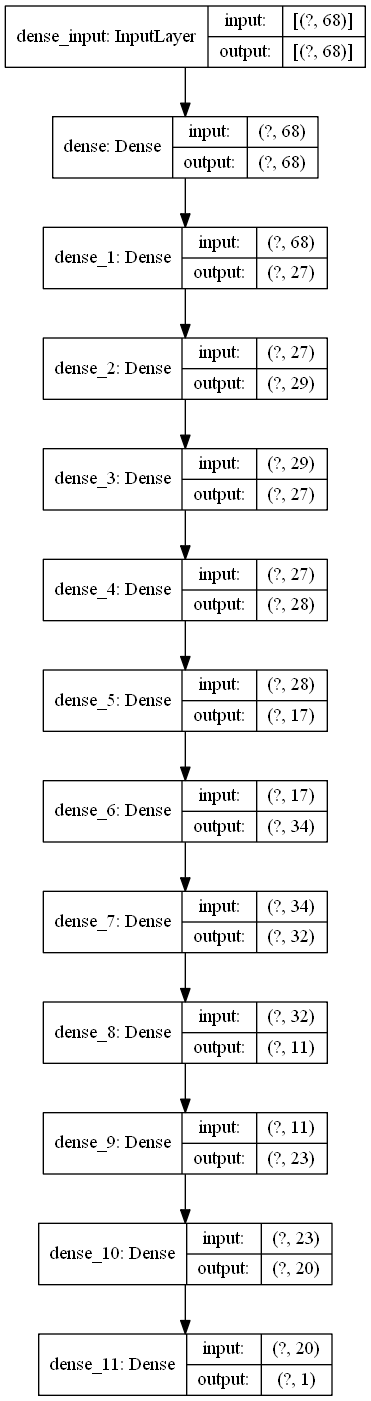

In [38]:
tf.keras.utils.plot_model(best_model6, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Usar el modelo keras

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1, 68)             4692      
_________________________________________________________________
dense_14 (Dense)             (None, 1, 27)             1863      
_________________________________________________________________
dense_15 (Dense)             (None, 1, 29)             812       
_________________________________________________________________
dense_16 (Dense)             (None, 1, 27)             810       
_________________________________________________________________
dense_17 (Dense)             (None, 1, 28)             784       
_________________________________________________________________
dense_18 (Dense)             (None, 1, 17)             493       
_________________________________________________________________
dense_19 (Dense)             (None, 1, 34)            

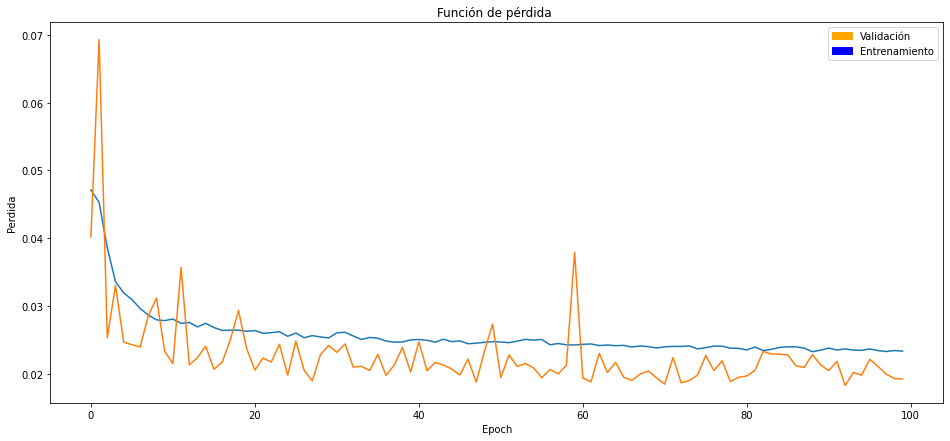

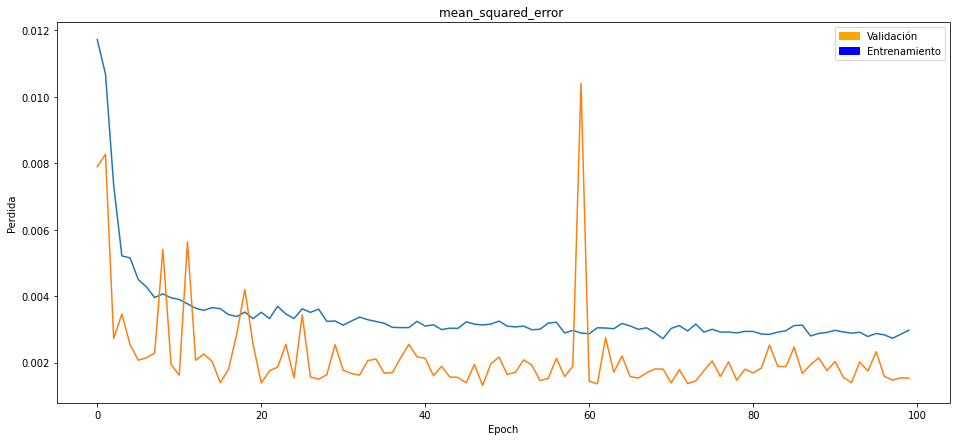

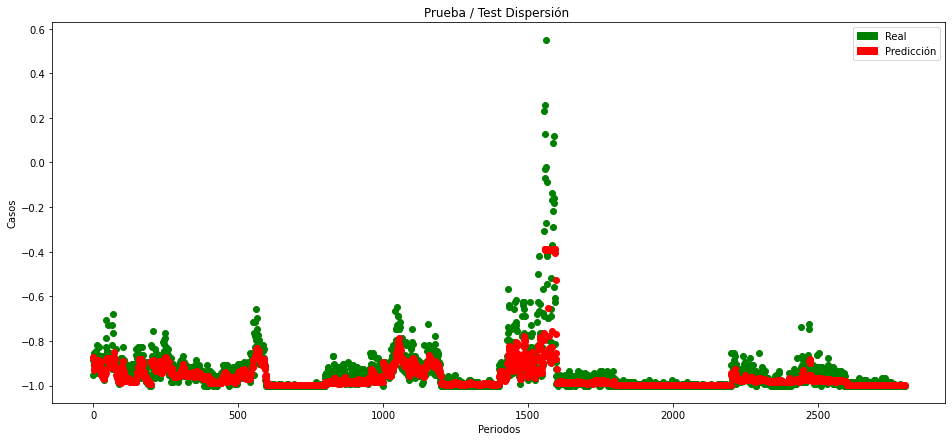

C:\Users\danny\.conda\envs\env_asus_old\lib\site-packages\ipykernel_launcher.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


antes =  (2800, 2)
despues =  (2800, 69)
inverted =  (2800, 69)


,real,prediccion,diferencia
0,5.999999,15.519544,-9.519545
1,14.000000,14.929037,-0.929037
2,11.000004,14.434560,-3.434556
3,12.999999,11.239875,1.760124
4,11.000004,8.668168,2.331836
...,...,...,...
2795,0.000000,0.091562,-0.091562
2796,0.000000,0.091569,-0.091569
2797,0.000000,0.091569,-0.091569
2798,0.000000,0.091569,-0.091569


describe =                real   prediccion   diferencia
count  2800.000000  2800.000000  2800.000000
mean      6.723929     4.683485     2.040444
std      12.471727     8.356540     7.206578
min       0.000000     0.091562   -50.043616
25%       0.000000     0.091649    -0.091671
50%       3.000003     2.170015     0.369317
75%       9.000002     5.792140     2.980796
max     190.000005    74.994287   122.119484


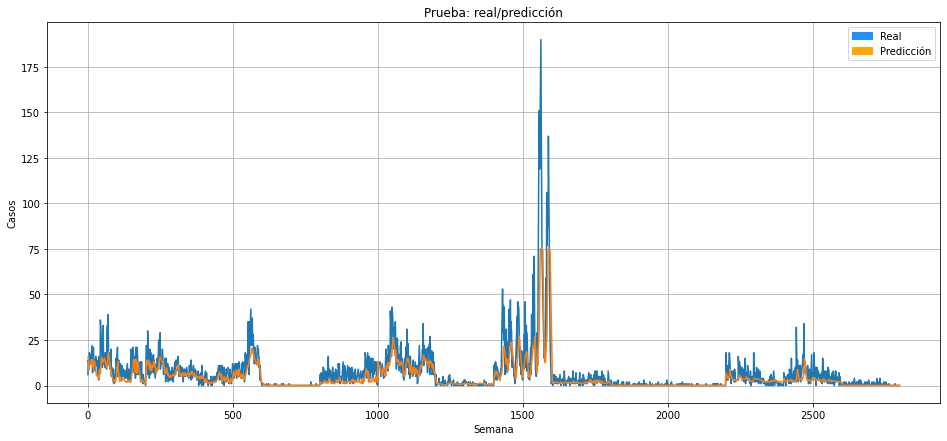

mean_absolute_error =  3.2439910293049947
mean_squared_error =  56.07962289758997
r2_score =  0.6393324895603032
explained_variance_score =  0.6661088223620932


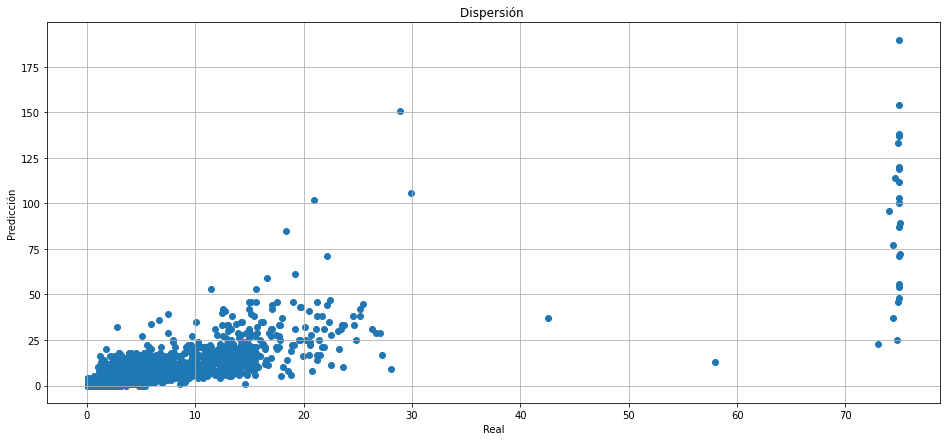

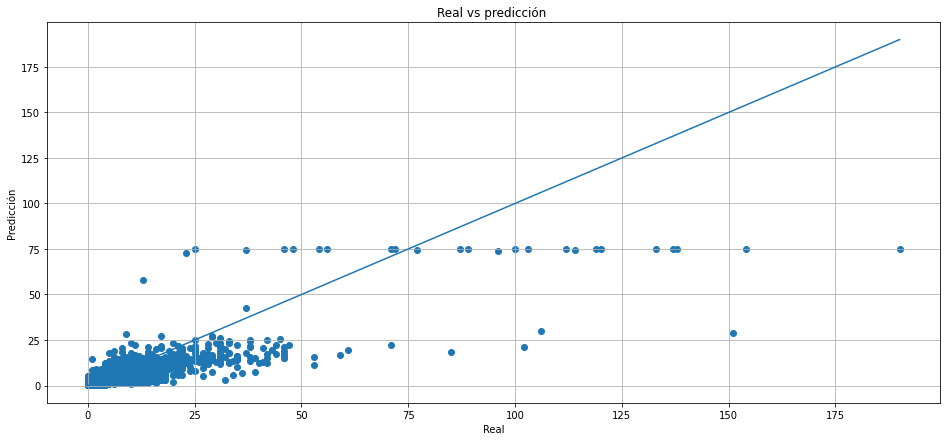

In [20]:
def crear_modeloFF():
    np.random.seed(7) # for reproducibility
    model = Sequential()
    model.add(Dense(68, input_shape=(1,PASOS*4+44),activation='softsign'))
    model.add(Dense(27, input_shape=(1,68),activation='softsign'))
    model.add(Dense(29, input_shape=(1,27),activation='softsign'))
    model.add(Dense(27, input_shape=(1,68),activation='softsign'))
    model.add(Dense(28, input_shape=(1,27),activation='softsign'))
    model.add(Dense(17, input_shape=(1,29),activation='softsign'))
    model.add(Dense(34, input_shape=(1,17),activation='softsign'))
    model.add(Dense(32, input_shape=(1,34),activation='softsign'))
    model.add(Dense(11, input_shape=(1,32),activation='softsign'))
    model.add(Dense(23, input_shape=(1,11),activation='softsign'))
    model.add(Dense(20, input_shape=(1,23),activation='softsign'))
    model.add(Dense(1, input_shape=(1,20),activation='softsign'))

    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',
                  optimizer=keras.optimizers.SGD(lr=0.1, momentum=0.6), metrics=['mse'])
    model.summary()
    return model

EPOCHS=100
model = crear_modeloFF()
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val2,y_val2), batch_size=2,
                  workers=12,verbose=0)


plt.figure()
orange_patch = mpatches.Patch(color='orange', label='Validación')
blue_patch = mpatches.Patch(color='blue', label='Entrenamiento')
plt.legend(handles=[orange_patch, blue_patch])
plt.title('Función de pérdida ')
plt.xlabel("Epoch")
plt.ylabel("Perdida")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.figure()
orange_patch = mpatches.Patch(color='orange', label='Validación')
blue_patch = mpatches.Patch(color='blue', label='Entrenamiento')
plt.legend(handles=[orange_patch, blue_patch])
plt.title('mean_squared_error ')
plt.xlabel("Epoch")
plt.ylabel("Perdida")
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.show()

#4 LINEAS SIGUIENTES PARA HACER METRICAS POR DEPARTAMENTO
# for dept in dept_list:
#     dept_df=test_dept_dicc[dept]
    
#     x_val, y_val = dept_df.values[:, :-1], dept_df.values[:, -1]
#     x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))

#Metricas de todo
results=model.predict(x_test)
plt.figure()
green_patch = mpatches.Patch(color='green', label='Real')
red_patch = mpatches.Patch(color='red', label='Predicción')
plt.legend(handles=[green_patch, red_patch])
plt.title('Prueba / Test Dispersión ')
plt.xlabel("Periodos")
plt.ylabel("Casos")
plt.scatter(range(len(y_test)),y_test,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.show()

compara = pd.DataFrame(np.array([y_test, [x[0] for x in results]])).transpose()
compara.columns = ['real', 'prediccion']
print("antes = ", compara.shape)

#para par, /2
#compara=pd.concat([compara for c in range(12)], axis=1)  
#Sirve porque es la cantidad de columnas del df es impar (incuyendo la variable objetivo)
compara=pd.concat([compara for c in range(34)]+[compara["real"]], axis=1)     
print("despues = ", compara.shape)
inverted = scaler.inverse_transform(compara.values)
print("inverted = ", inverted.shape)
#par
#compara2 = pd.DataFrame(inverted[:,-2:])
compara2 = pd.DataFrame(inverted[:,-3:-1])
compara2.columns = ['real', 'prediccion']
compara2['diferencia'] = compara2['real'] - compara2['prediccion']
display(compara2.tail(4000))

print("describe = ", compara2.describe())

plt.title('Prueba: real/predicción')
plt.xlabel("Semana")
plt.ylabel("Casos")
compara2['real'].plot()
compara2['prediccion'].plot()
plt.grid(True)
green_patch = mpatches.Patch(color='dodgerblue', label='Real')
red_patch = mpatches.Patch(color='orange', label='Predicción')
plt.legend(handles=[green_patch, red_patch])
plt.show()

print("mean_absolute_error = ",mean_absolute_error(compara2["real"], compara2["prediccion"]))
print("mean_squared_error = ",mean_squared_error(compara2["real"], compara2["prediccion"]))
print("r2_score = ", r2_score(compara2["real"], compara2["prediccion"]))
print("explained_variance_score = ",explained_variance_score(compara2["real"], compara2["prediccion"]))

plt.figure()
plt.title('Dispersión ')
plt.xlabel("Real")
plt.ylabel("Predicción")
x = compara2["real"].values
y = compara2["prediccion"].values
plt.scatter(y, x)
plt.grid(True)
plt.show()

plt.figure()
identity_line = np.linspace(x.min(), x.max())
plt.scatter(x, y)
plt.title('Real vs predicción ')
plt.xlabel("Real")
plt.ylabel("Predicción")
plt.plot(identity_line, identity_line)
plt.grid(True)
plt.show()

# TUNING XGBOOST - RandomizedSearchCV

In [37]:
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBRegressor
xg_reg = XGBRegressor()

In [38]:
parameters = {"learning_rate"    : [0.001, 0.01, 0.03,0.04,0.05, 0.06,0.10, 0.20, 0.50, 0.90 ] ,
              "base_score":[0.1,0.3,0.4,0.5,0.6,0.8,0.9,0.99,0.999],

 "max_depth"        : [6, 7, 8, 9, 10, 12, 15],
 "min_child_weight" : [1, 3, 5, 7 ],
 'gamma':[0.01,0.04,0.05,0.06,0.07,0.08,0.09, 0.1,0.5,0.9],
 'subsample':[0.5,0.6,0.8,0.9,0.99,0.999],
 'colsample_bytree':[0.1,0.3,0.4,0.5,0.6,0.8,0.9,0.99,0.99],
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05,0.06, 0.07, 0.08,0.09,0.1],
             'n_estimators':[100, 500, 1000]}

In [39]:
clf = RandomizedSearchCV(xg_reg, parameters, n_jobs=12, n_iter=10,verbose=2, cv=6, refit=True, random_state=7)

In [40]:
nsamples, nx, ny = x_train.shape
x_train_new = x_train.reshape((nsamples,nx*ny))

clf.fit(x_train_new, y_train)

Fitting 6 folds for each of 10 candidates, totalling 60 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:   15.2s
[Parallel(n_jobs=12)]: Done  60 out of  60 | elapsed:  1.9min finished


[19:59:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=6, estimator=XGBRegressor(), n_jobs=12,
                   param_distributions={'base_score': [0.1, 0.3, 0.4, 0.5, 0.6,
                                                       0.8, 0.9, 0.99, 0.999],
                                        'colsample_bytree': [0.1, 0.3, 0.4, 0.5,
                                                             0.6, 0.8, 0.9,
                                                             0.99, 0.99],
                                        'gamma': [0.01, 0.04, 0.05, 0.06, 0.07,
                                                  0.08, 0.09, 0.1, 0.5, 0.9],
                                        'learning_rate': [0.001, 0.01, 0.03,
                                                          0.04, 0.05, 0.06, 0.1,
                                                          0.2, 0.5, 0.9],
                                        'max_depth': [6, 7, 8, 9, 10, 12, 15],
                                        'min_child_weight': [1, 3, 5, 7],
     

In [41]:
nsamples_x_val, nx_val, ny_val = x_val.shape
x_val_new = x_val.reshape((nsamples_x_val,nx_val*ny_val))

print(x_val_new.shape)
print(y_val.shape)

results2=clf.predict(x_val_new)

(2744, 68)
(2744,)


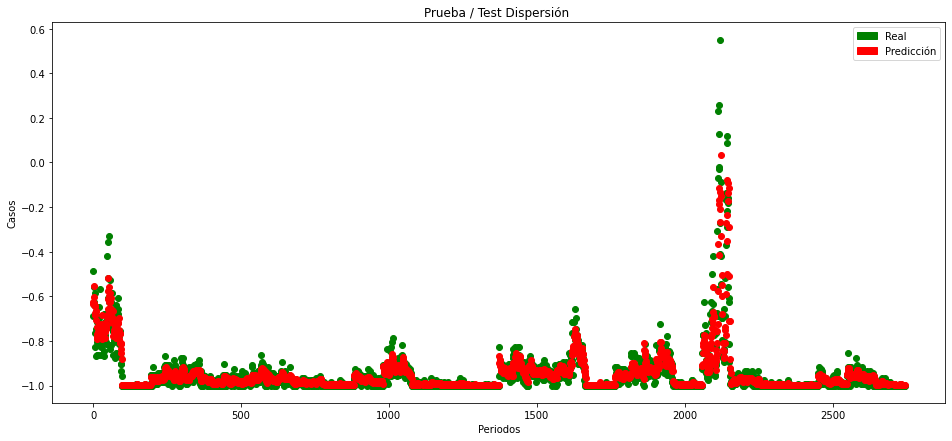

(2744, 2)


,real,prediccion,diferencia
0,63.000000,45.797829,17.202171
1,37.999996,44.547596,-6.547600
2,53.999996,45.447529,8.552467
3,44.000000,54.501842,-10.501842
4,46.000004,48.840321,-2.840317
...,...,...,...
2739,0.000000,0.509292,-0.509292
2740,0.000000,0.509292,-0.509292
2741,0.000000,0.509292,-0.509292
2742,0.000000,0.509292,-0.509292


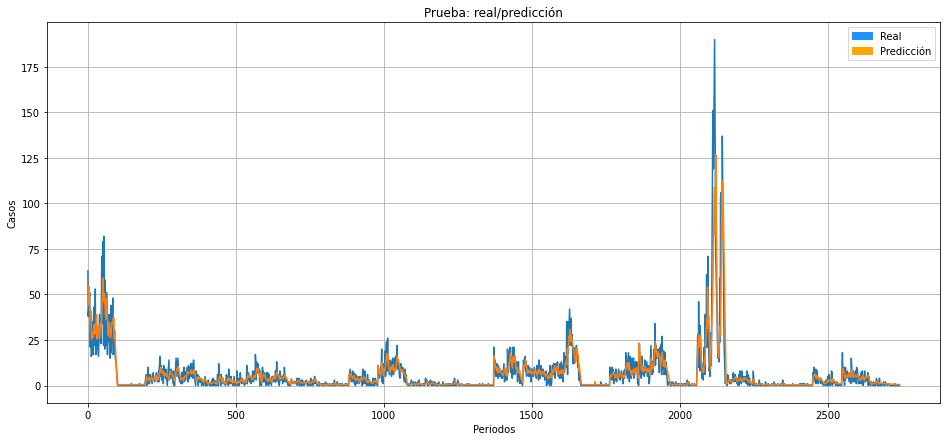

mean_absolute_error =  2.7000206
mean_squared_error =  41.770954
r2_score =  0.7519690220860027
explained_variance_score =  0.7521551251411438


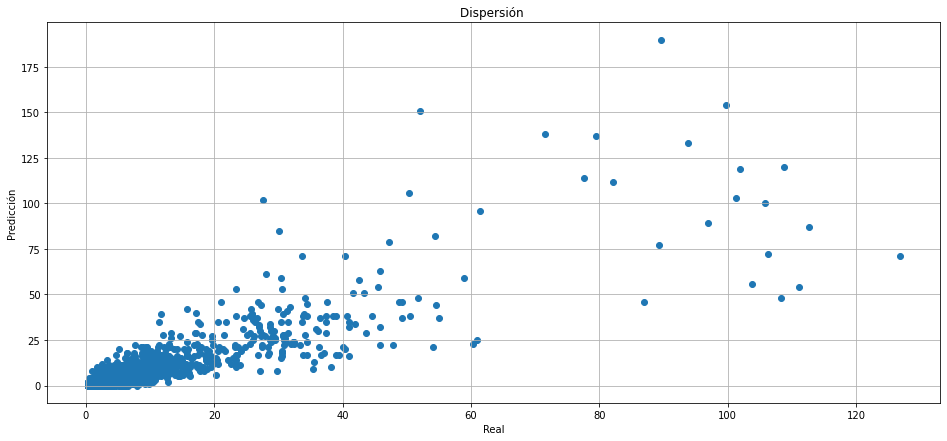

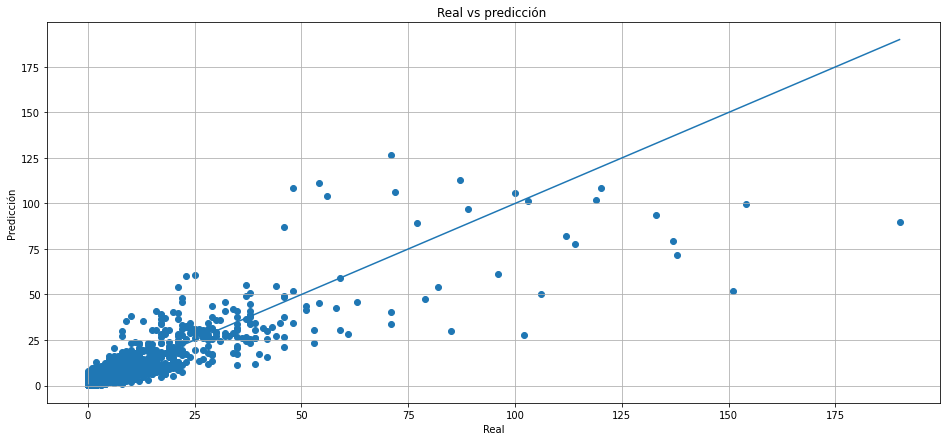

In [42]:
from matplotlib import pyplot

plt.figure()
green_patch = mpatches.Patch(color='green', label='Real')
red_patch = mpatches.Patch(color='red', label='Predicción')
plt.legend(handles=[green_patch, red_patch])
plt.title('Prueba / Test Dispersión ')
plt.xlabel("Periodos")
plt.ylabel("Casos")
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results2)),results2,c='r')
plt.show()

compara = pd.DataFrame(np.array([y_val, [x for x in results2]])).transpose()
compara.columns = ['real', 'prediccion']
print(compara.shape)
compara=pd.concat([compara for c in range(34)]+[compara["real"]], axis=1)     
inverted = scaler.inverse_transform(compara.values)
compara2 = pd.DataFrame(inverted[:,-3:-1])
compara2.columns = ['real', 'prediccion']
compara2['diferencia'] = compara2['real'] - compara2['prediccion']
display(compara2.tail(4000))

compara2.describe()

plt.title('Prueba: real/predicción')
plt.xlabel("Periodos")
plt.ylabel("Casos")
compara2['real'].plot()
compara2['prediccion'].plot()
plt.grid(True)
green_patch = mpatches.Patch(color='dodgerblue', label='Real')
red_patch = mpatches.Patch(color='orange', label='Predicción')
plt.legend(handles=[green_patch, red_patch])
plt.show()

print("mean_absolute_error = ",mean_absolute_error(compara2["real"], compara2["prediccion"]))
print("mean_squared_error = ",mean_squared_error(compara2["real"], compara2["prediccion"]))
print("r2_score = ", r2_score(compara2["real"], compara2["prediccion"]))
print("explained_variance_score = ",explained_variance_score(compara2["real"], compara2["prediccion"]))

plt.figure()
plt.title('Dispersión ')
plt.xlabel("Real")
plt.ylabel("Predicción")
x = compara2["real"].values
y = compara2["prediccion"].values
plt.scatter(y, x)
plt.grid(True)
plt.show()

plt.figure()
identity_line = np.linspace(x.min(), x.max())
plt.scatter(x, y)
plt.title('Real vs predicción ')
plt.xlabel("Real")
plt.ylabel("Predicción")
plt.plot(identity_line, identity_line)
plt.grid(True)
plt.show()


In [53]:
params=clf.best_estimator_.get_params()

In [54]:
params

{'base_score': 0.9,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.5,
 'gamma': 0.1,
 'importance_type': 'gain',
 'learning_rate': 0.2,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 1000,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0.1,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 0.999,
 'verbosity': 1}

In [13]:
d2_train_dataset.shape

(8848, 68)

### Usar el modelo XGBOOST

(8848, 68)
(8848,)
(2800, 68)
(2800, 68)
(2800,)
(2800, 1, 68)


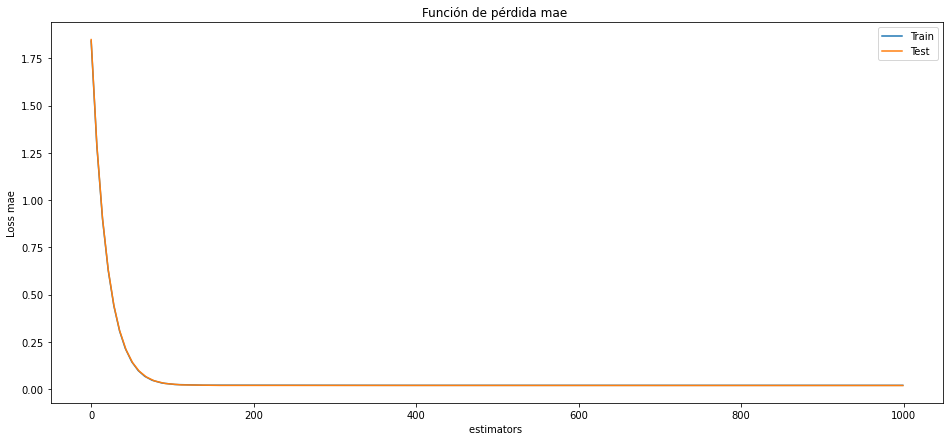

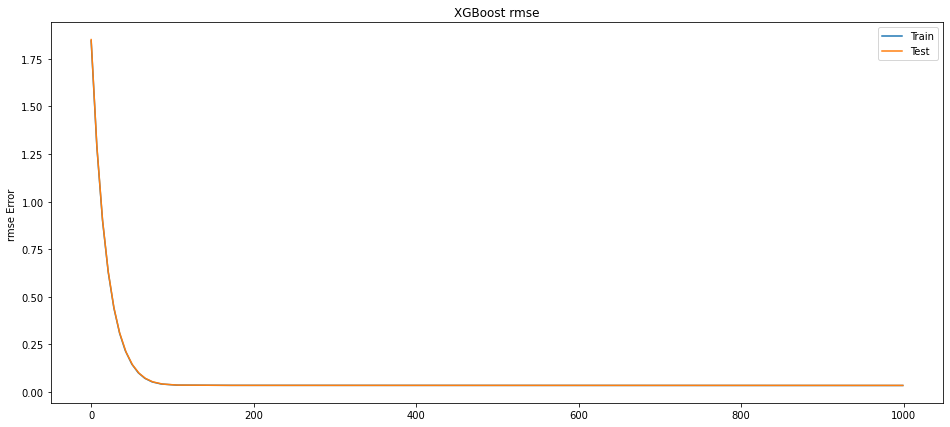

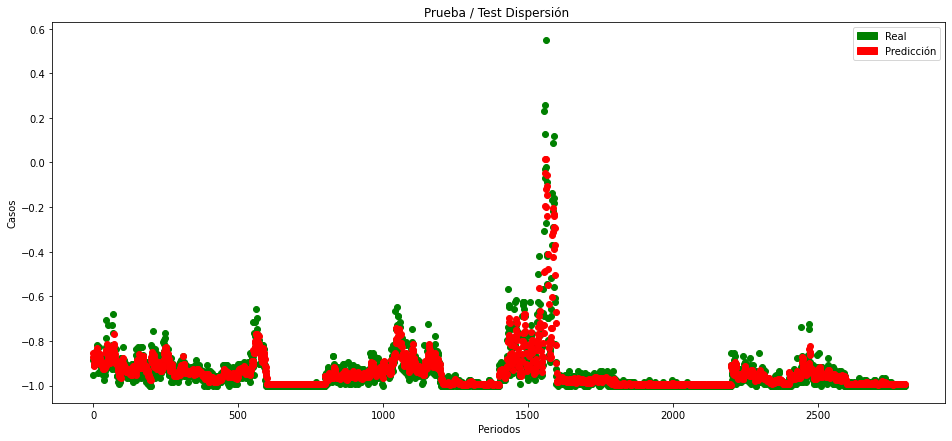

(2800, 2)


,real,prediccion,diferencia
0,5.999999,17.969322,-11.969323
1,14.000000,15.664538,-1.664538
2,11.000004,14.711509,-3.711505
3,12.999999,12.228171,0.771828
4,11.000004,10.628705,0.371299
...,...,...,...
2795,0.000000,0.589952,-0.589952
2796,0.000000,0.589952,-0.589952
2797,0.000000,0.589952,-0.589952
2798,0.000000,0.589952,-0.589952


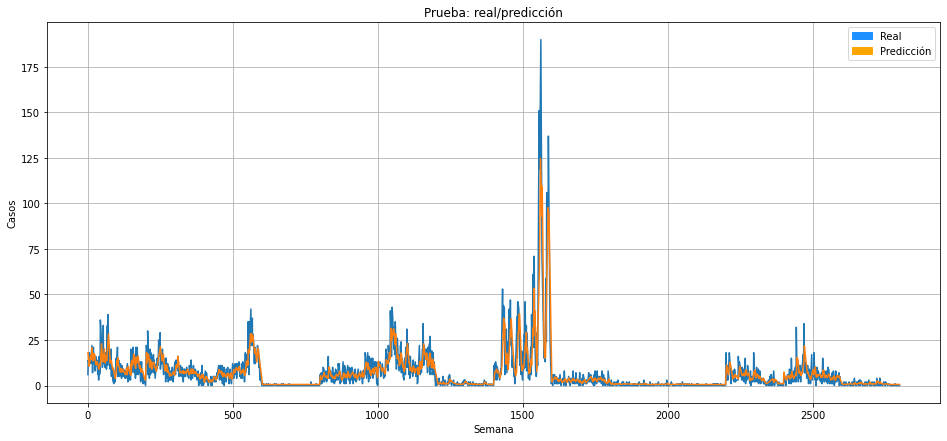

mean_absolute_error =  2.9885678
mean_squared_error =  40.23055
r2_score =  0.7412633946910011
explained_variance_score =  0.7412643432617188


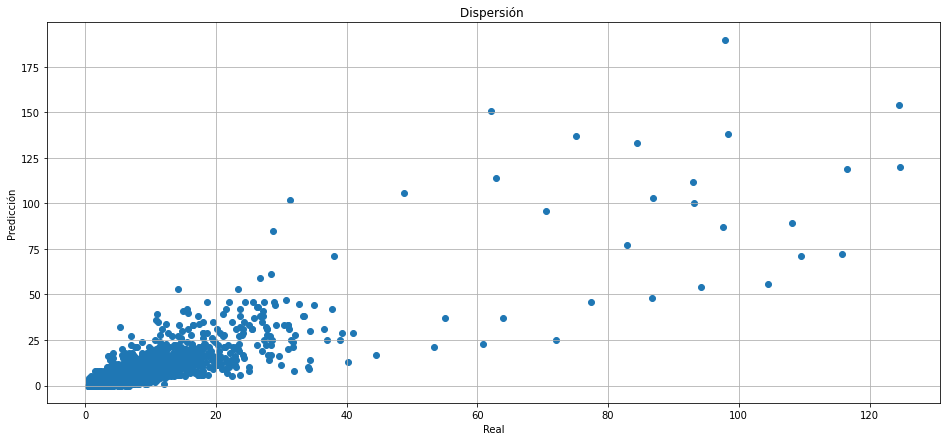

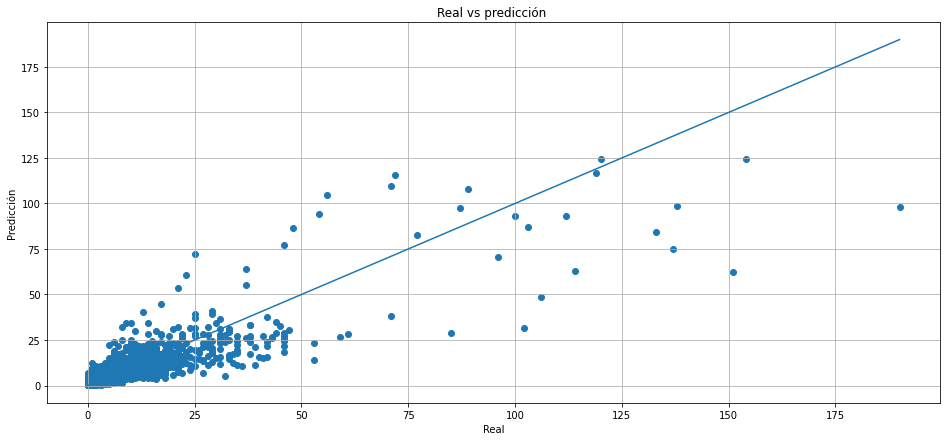

In [13]:
nsamples, nx, ny = x_train.shape
d2_train_dataset = x_train.reshape((nsamples,nx*ny))
nsamples_x_val, nx_val, ny_val = x_val2.shape
x_val_new = x_val2.reshape((nsamples_x_val,nx_val*ny_val))

nsamples_x_test, nx_test, ny_test = x_test.shape
x_test_new = x_test.reshape((nsamples_x_test,nx_test*ny_test))

print(d2_train_dataset.shape)
print(y_train.shape)
print(x_val_new.shape)

print(x_test_new.shape)
print(y_test.shape)
print(x_test.shape)

d2_train_dataset_final=pd.DataFrame(d2_train_dataset, columns=columns_final)
x_val_new_final=pd.DataFrame(x_val_new, columns=columns_final)
x_test_new_final=pd.DataFrame(x_test_new, columns=columns_final)

eval_set = [(d2_train_dataset_final, y_train),(x_val_new_final, y_val2)]

from xgboost import XGBRegressor
xg_reg = XGBRegressor(base_score=0.99,
 booster= 'gbtree',
 colsample_bylevel= 1,
 colsample_bynode= 1,
 colsample_bytree= 0.5,
 gamma= 0.1,
 importance_type= 'gain',
 learning_rate= 0.05,
 max_delta_step= 0,
  max_depth= 8,
 min_child_weight= 1,
 n_estimators= 1000,
 n_jobs= 12,
 objective= 'reg:squarederror',
 random_state= 7,
 reg_alpha= 0.1,
 reg_lambda= 1,
 scale_pos_weight= 1,
 subsample= 0.999,
 verbosity= 1)

xg_reg.fit(d2_train_dataset_final, y_train, eval_metric=["mae", "rmse"], eval_set=eval_set, verbose=False)


results2=xg_reg.predict(x_test_new_final)

from matplotlib import pyplot

results = xg_reg.evals_result()
epochs = len(results['validation_0']['mae'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Test')
ax.legend()
pyplot.ylabel('Loss mae')
pyplot.xlabel('estimators ')
pyplot.title('Función de pérdida mae ')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('rmse Error ')
pyplot.title('XGBoost rmse')
pyplot.show()

# plt.figure()
# orange_patch = mpatches.Patch(color='orange', label='Validación')
# blue_patch = mpatches.Patch(color='blue', label='Entrenamiento')
# plt.legend(handles=[orange_patch, blue_patch])
# plt.title('Función de perdida ')
# plt.xlabel("Epoch")
# plt.ylabel("Perdida")
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.show()

# plt.figure()
# orange_patch = mpatches.Patch(color='orange', label='Validación')
# blue_patch = mpatches.Patch(color='blue', label='Entrenamiento')
# plt.legend(handles=[orange_patch, blue_patch])
# plt.title('mean_squared_error ')
# plt.xlabel("Epoch")
# plt.ylabel("Perdida")
# plt.plot(history.history['mean_squared_error'])
# plt.plot(history.history['val_mean_squared_error'])
# plt.show()

#4 LINEAS SIGUIENTES PARA HACER METRICAS POR DEPARTAMENTO
# for dept in dept_list:
#     dept_df=test_dept_dicc[dept]
    
#     x_val, y_val = dept_df.values[:, :-1], dept_df.values[:, -1]
#     x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))

#Metricas de todo



plt.figure()
green_patch = mpatches.Patch(color='green', label='Real')
red_patch = mpatches.Patch(color='red', label='Predicción')
plt.legend(handles=[green_patch, red_patch])
plt.title('Prueba / Test Dispersión ')
plt.xlabel("Periodos")
plt.ylabel("Casos")
plt.scatter(range(len(y_test)),y_test,c='g')
plt.scatter(range(len(results2)),results2,c='r')
plt.show()

compara = pd.DataFrame(np.array([y_test, [x for x in results2]])).transpose()
compara.columns = ['real', 'prediccion']
print(compara.shape)
compara=pd.concat([compara for c in range(34)]+[compara["real"]], axis=1)     
inverted = scaler.inverse_transform(compara.values)
compara2 = pd.DataFrame(inverted[:,-3:-1])
compara2.columns = ['real', 'prediccion']
compara2['diferencia'] = compara2['real'] - compara2['prediccion']
display(compara2.tail(4000))

compara2.describe()

#plt.figure()
#green_patch = mpatches.Patch(color='green', label='Real')
#red_patch = mpatches.Patch(color='red', label='Predicción')
#plt.legend(handles=[green_patch, red_patch])
#plt.title('Prueba / Test ')
#plt.xlabel("Periodos")
#plt.ylabel("Casos")
#compara2['real'].plot()
#compara2['prediccion'].plot()
#plt.show()

plt.title('Prueba: real/predicción')
plt.xlabel("Semana")
plt.ylabel("Casos")
compara2['real'].plot()
compara2['prediccion'].plot()
plt.grid(True)
green_patch = mpatches.Patch(color='dodgerblue', label='Real')
red_patch = mpatches.Patch(color='orange', label='Predicción')
plt.legend(handles=[green_patch, red_patch])
plt.show()
print("mean_absolute_error = ",mean_absolute_error(compara2["real"], compara2["prediccion"]))
print("mean_squared_error = ",mean_squared_error(compara2["real"], compara2["prediccion"]))
print("r2_score = ", r2_score(compara2["real"], compara2["prediccion"]))
print("explained_variance_score = ",explained_variance_score(compara2["real"], compara2["prediccion"]))

plt.figure()
plt.title('Dispersión ')
plt.xlabel("Real")
plt.ylabel("Predicción")
x = compara2["real"].values
y = compara2["prediccion"].values
plt.scatter(y, x)
plt.grid(True)
plt.show()

plt.figure()
identity_line = np.linspace(x.min(), x.max())
plt.scatter(x, y)
plt.title('Real vs predicción ')
plt.xlabel("Real")
plt.ylabel("Predicción")
plt.plot(identity_line, identity_line)
plt.grid(True)
plt.show()


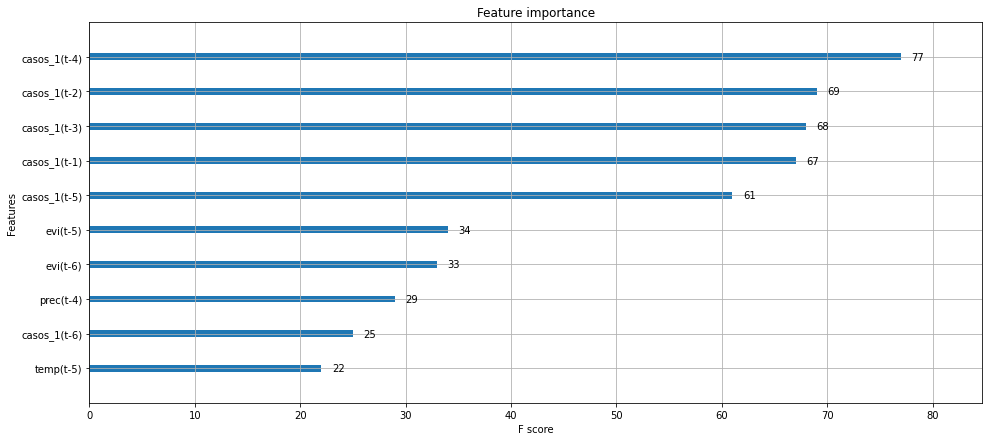

In [14]:
from matplotlib import pyplot
from xgboost import plot_importance
#pyplot.bar(range(len(model.model.feature_importances_)), model.model.feature_importances_)
plot_importance(xg_reg, max_num_features=10)
pyplot.show()

In [15]:
xg_reg.feature_importances_

array([0.01242209, 0.00149445, 0.01960668, 0.01094762, 0.        ,
       0.00545352, 0.00937005, 0.        , 0.00216164, 0.01024862,
       0.        , 0.00624919, 0.02613504, 0.        , 0.00853474,
       0.00542263, 0.00929011, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00557851,
       0.        , 0.00191867, 0.00212808, 0.00243314, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0021236 , 0.        , 0.        , 0.00157992, 0.        ,
       0.        , 0.00124835, 0.00270356, 0.        , 0.00856208,
       0.00919789, 0.0184363 , 0.00719984, 0.00700751, 0.00757076,
       0.00827892, 0.0100677 , 0.01238983, 0.00514013, 0.01051757,
       0.00604009, 0.01060079, 0.01336996, 0.00797078, 0.00648908,
       0.01671221, 0.00990685, 0.01088046, 0.03683632, 0.14409159,
       0.1184986 , 0.15806101, 0.20912342], dtype=float32)

In [62]:
pd.DataFrame(zip(xg_reg.get_booster().feature_names, xg_reg.feature_importances_)).sort_values(by=1, ascending=False).head(20)

,0,1
67,casos_1(t-1),0.209123
66,casos_1(t-2),0.158061
64,casos_1(t-4),0.144092
65,casos_1(t-3),0.118499
63,casos_1(t-5),0.036836
12,herbazales,0.026135
2,Número de personas secuestradas,0.019607
46,evi(t-4),0.018436
60,temp(t-2),0.016712
57,temp(t-5),0.013370


## Draw xgbost model

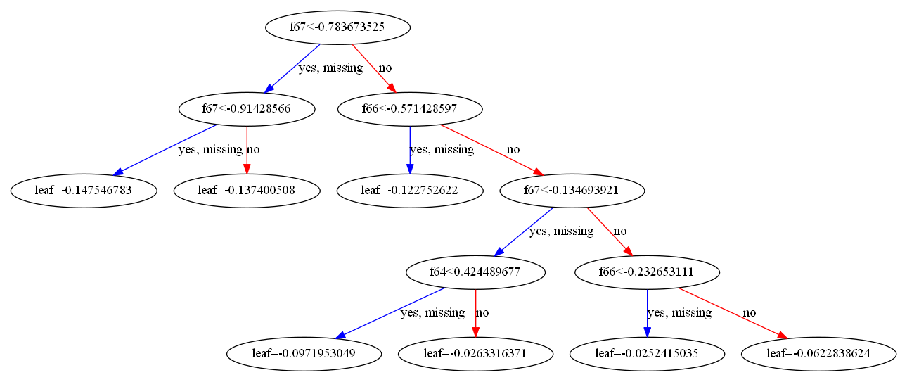

In [31]:
from xgboost import plot_tree
plot_tree(xg_reg)
plt.show()

# Draw NN

In [24]:
from matplotlib import pyplot
from math import cos, sin, atan


class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        pyplot.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        pyplot.figure()
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'Neural Network architecture', fontsize=15 )
        pyplot.show()

class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()

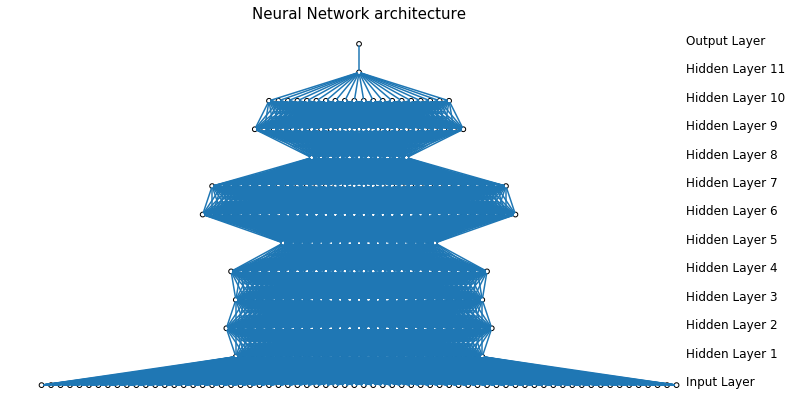

In [25]:
network = DrawNN( [68,27,29,27,28,17,34,32,11,23,20,1,1] )
network.draw()